<a href="https://colab.research.google.com/github/Shanelynch/Notebooks/blob/main/Unsupervised_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to my notebook on clustering wine based off of their properties.


In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import umap
import time

Reading in the data


https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering?datasetId=626341&sortBy=voteCount

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Shanelynch/datasets/main/wine-clustering.csv")

We will first get a feel at what the data looks like.

In [ ]:
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [ ]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.shape

(178, 13)

In [ ]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

Here we can take a visual look at the different features themselves to locate outlier data points

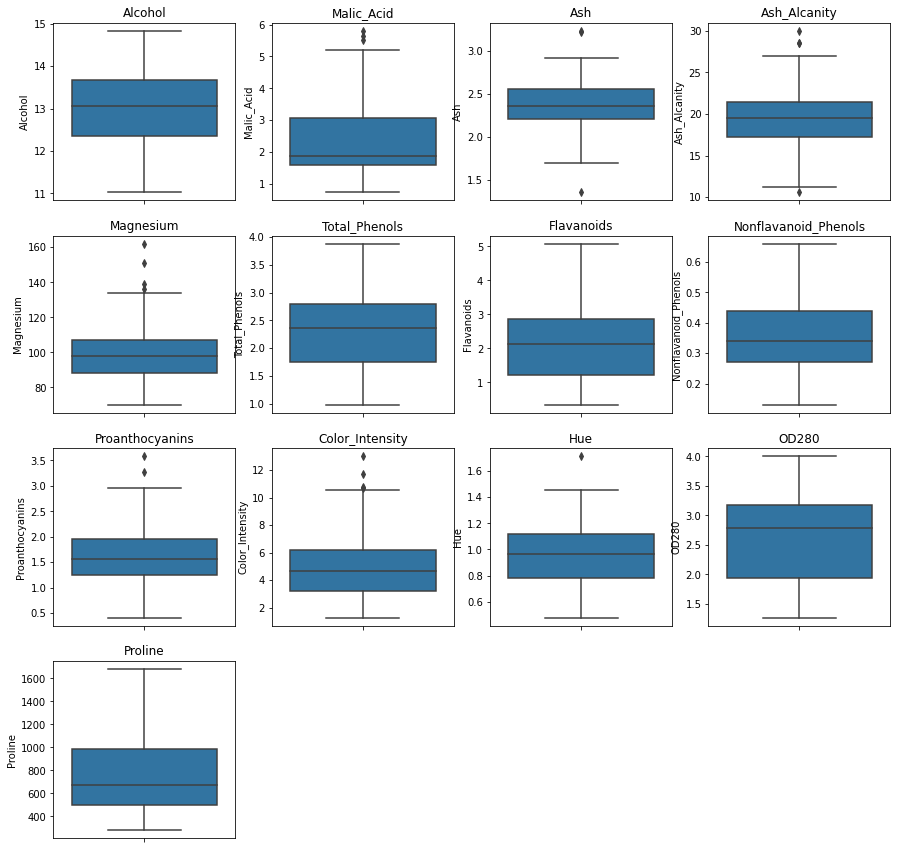

In [ ]:
plt.figure(figsize = [15, 15])
counter = 0

for i in df.columns:
    counter += 1
    plt.subplot(4, 4, counter)
    #sns.histplot(data = df, x = df[str(i)], multiple = 'dodge')
    sns.boxplot(data = df, y = df[str(i)], dodge=True)
    plt.title(str(i))
    plt.plot()

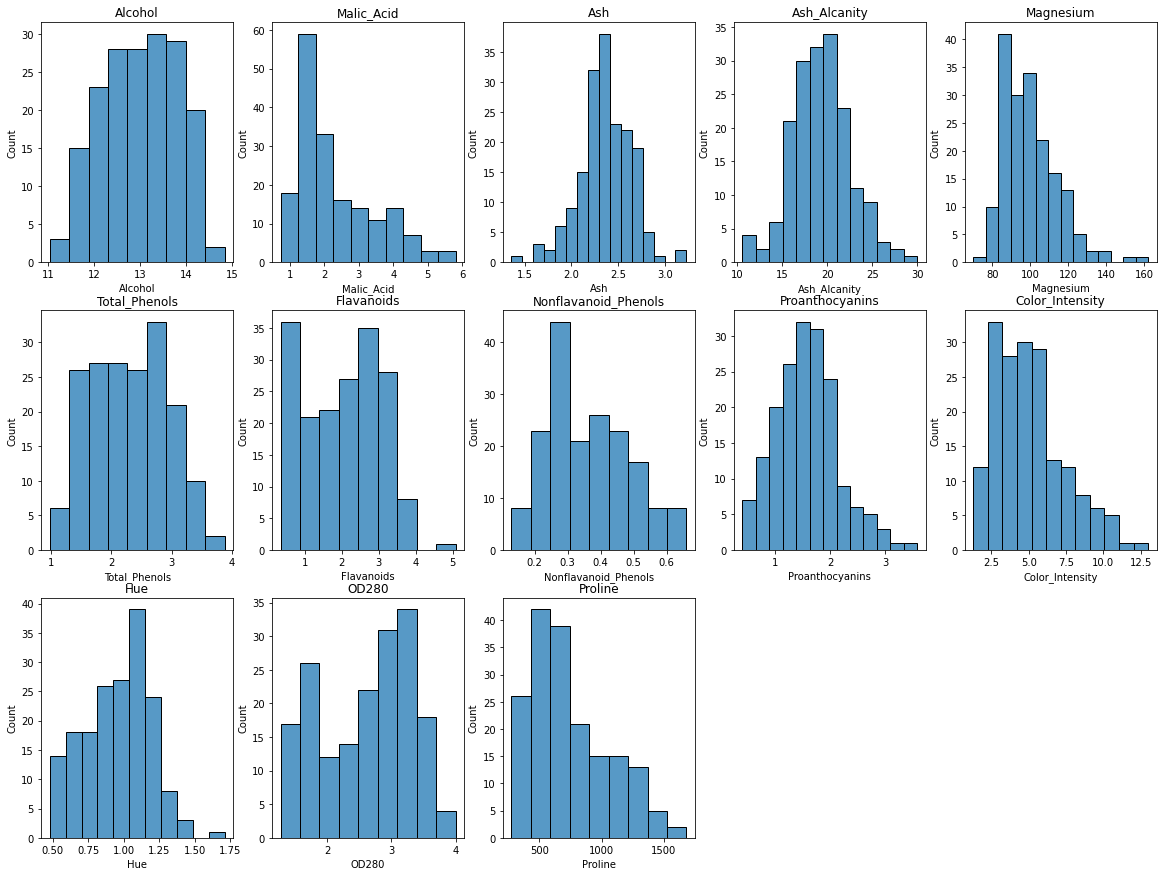

In [ ]:
plt.figure(figsize = [20, 15])
counter = 0

for i in df.columns:
    counter += 1
    plt.subplot(3, 5, counter)
    sns.histplot(data = df, x = df[str(i)], multiple = 'dodge')
    #sns.boxplot(data = df, y = df[str(i)], dodge=True)
    plt.title(str(i))
    plt.plot()

In [ ]:
q75, q25 = np.percentile(df, [75, 25])
iqr = q75 - q25

min_val = q25 - (iqr * 1.5)
max_val = q75 + (iqr * 1.5)
print("Number of outliers is: {}".format(len((np.where((df > max_val) | (df < min_val))[0]))))

Number of outliers is: 356


Now we will clean up the data using winsorization to limit the highest values to the 90th percentile

In [ ]:
for col in df.columns:
  df[col] = winsorize(df[col], (0, 0.10))

In [ ]:
df['Ash'] = winsorize(df['Ash'], (0.05, 0.10))

In [ ]:
df['Ash_Alcanity'] = winsorize(df['Ash_Alcanity'], (0.05, 0.10))

In [ ]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    12.979719    2.267921    2.363258     19.424719   98.629213   
std      0.777324    0.968551    0.229685      2.778338   11.661305   
min     11.030000    0.740000    1.920000     14.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.100000    3.990000    2.700000     24.000000  118.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.270899    1.993764              0.355225         1.553371   
std         0.584120    0.938244              0.112427         0.494240   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.100000    3.240000              0.530000         2.340000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          4.926854    0.948292    2.595506   735.926966  
std           2.030364    0.211839    0.686415   291.434597  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max           8.600000    1.240000    3.470000  1265.000000

Now we can visualize the data again, but this time after it has been cleaned.

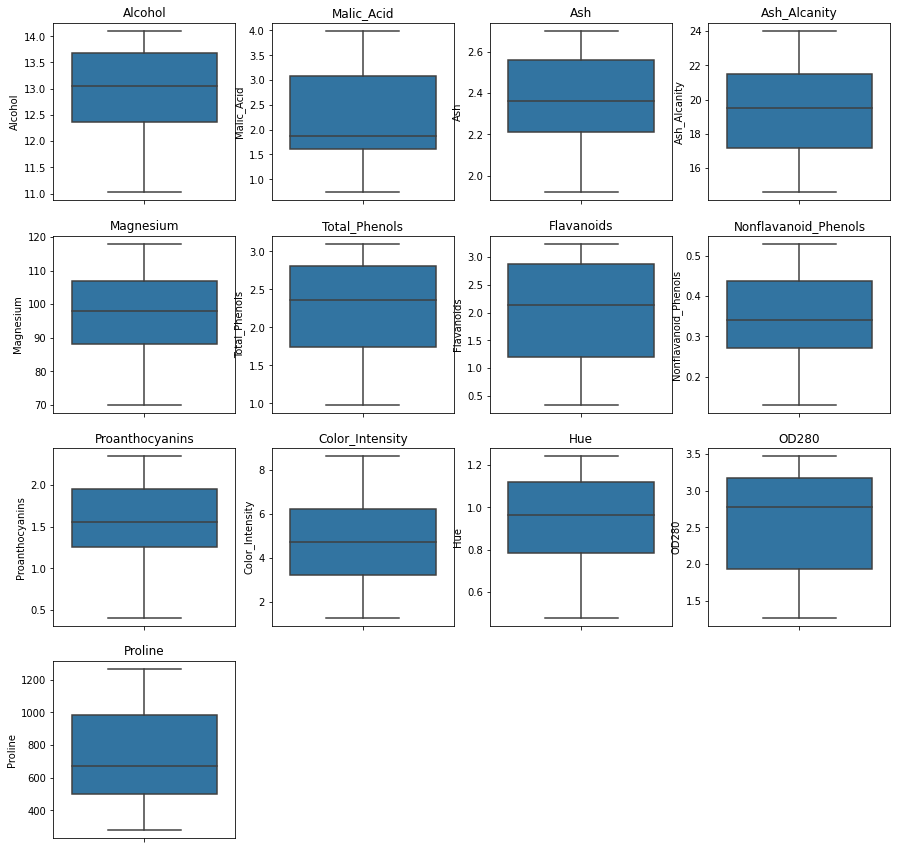

In [ ]:
plt.figure(figsize = [15, 15])
counter = 0

for i in df.columns:
    counter += 1
    plt.subplot(4, 4, counter)
    #sns.histplot(data = df, x = df[str(i)], multiple = 'dodge')
    sns.boxplot(data = df, y = df[str(i)], dodge=True)
    plt.title(str(i))
    plt.plot()

Now we can take a look at the correlation of the features to each other.

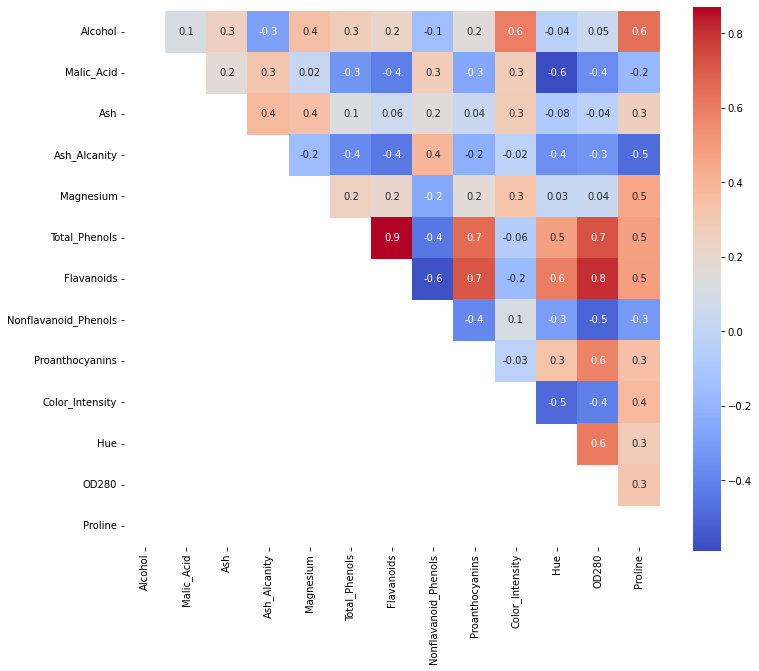

In [ ]:
plt.figure(figsize=(12, 10))
mask = np.tril(df.corr())
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt='.1g' ,square=True, mask=mask);

We can collect the highest correlated features and use on the clustering techniques by themselves

In [ ]:
df_corr = df[['Alcohol','Total_Phenols', 'Proline', 'Hue', 'Flavanoids', 'OD280', 'Proanthocyanins']]

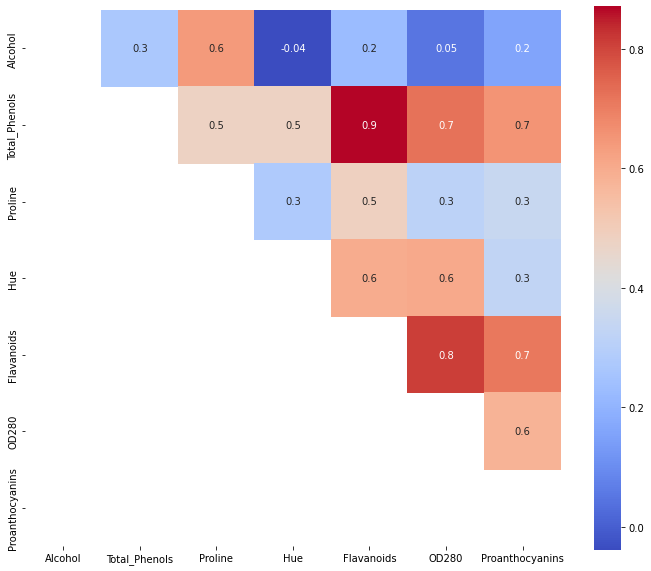

In [ ]:
plt.figure(figsize=(12, 10))
mask = np.tril(df_corr.corr())
sns.heatmap(df_corr.corr(), cmap="coolwarm", annot=True, fmt='.1g' ,square=True, mask=mask);

Now we can scale the data to be able to apply the techniques below on them

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

In [ ]:
scaler2 = StandardScaler()
corr_X = scaler.fit_transform(df_corr)

Here we can run the elbow method to find the amount of clusters to define for our models.

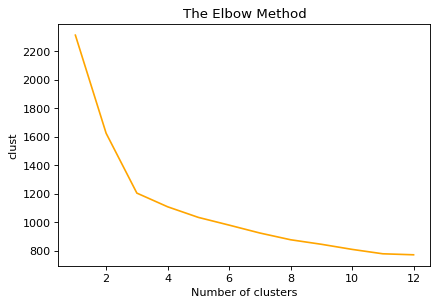

In [ ]:
clust = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_std)
    clust.append(kmeans.inertia_)

plt.figure(figsize=(6, 4), dpi=80)
plt.plot(range(1, 13), clust, color='orange')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('clust')
plt.show()

Here we are going to run the models on all of the features first and collect the silhouette scores for each.

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

25 ms ± 2.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


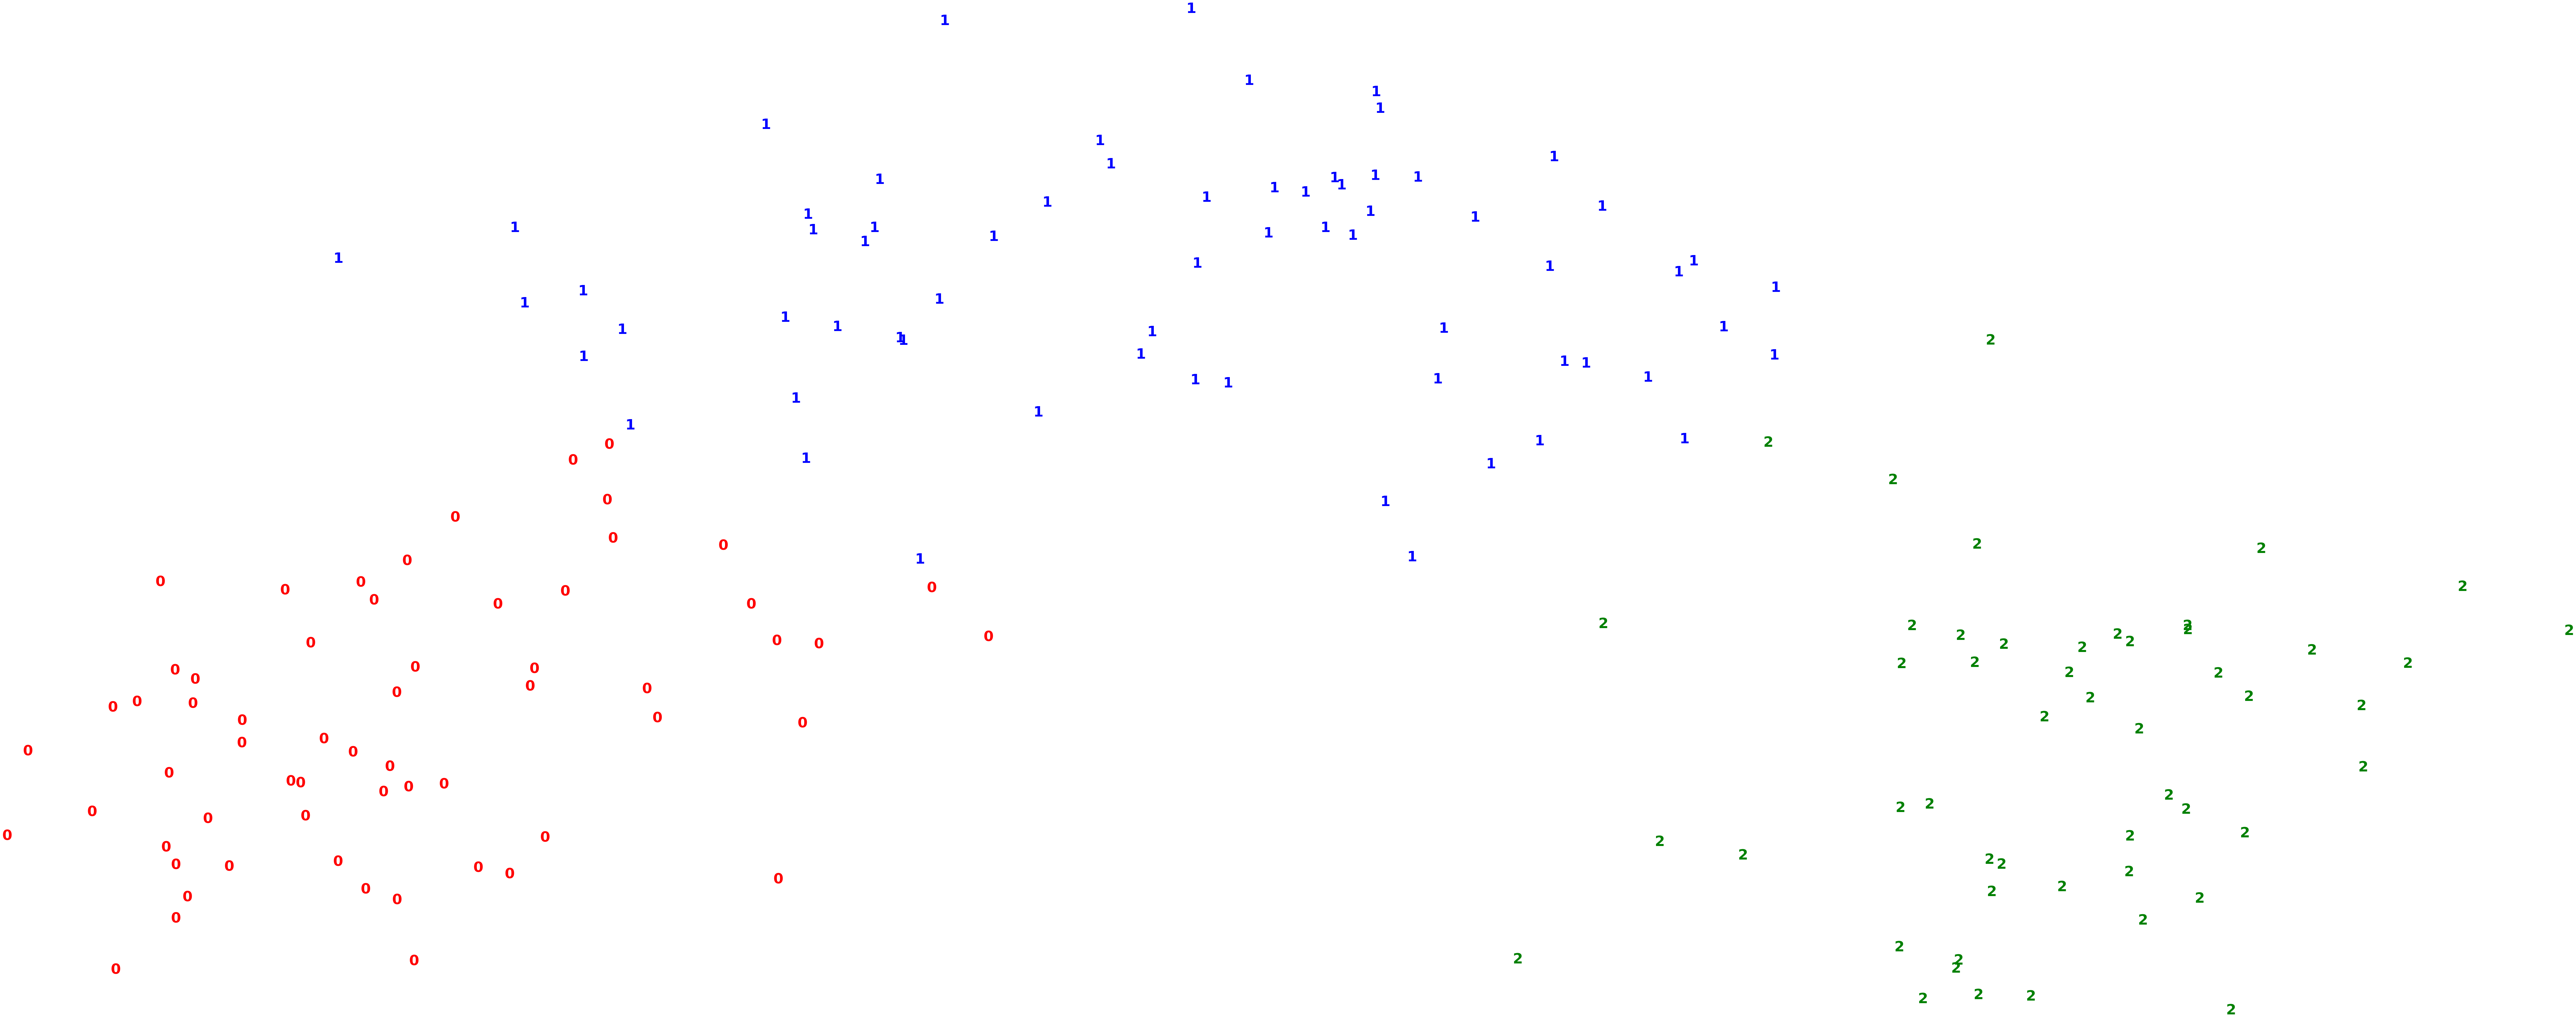

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)
plt.figure(facecolor='w', figsize=(20,10))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color = colours[y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print(metrics.silhouette_score(X_std, y_pred, metric='euclidean'))

0.3033088560958497


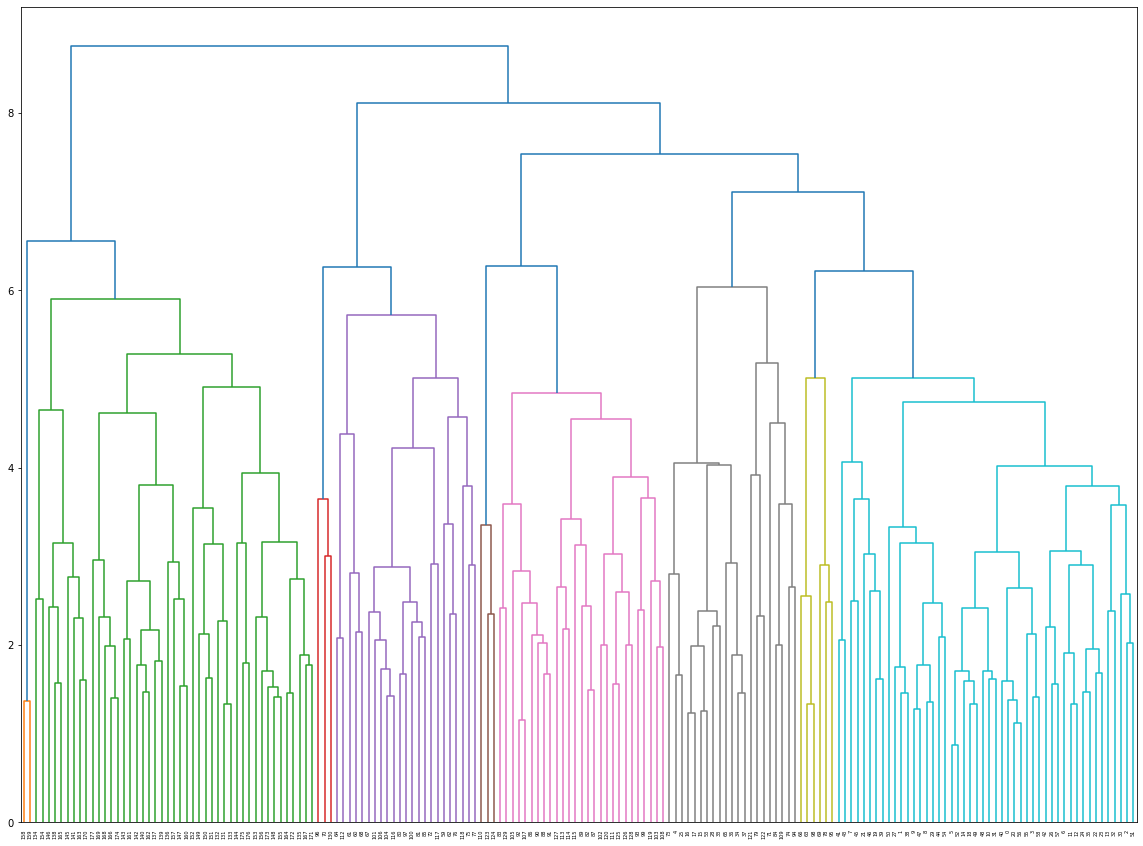

In [ ]:
plt.figure(facecolor='w', figsize=(20,15))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [ ]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='average',
                                      affinity='euclidean',
                                      n_clusters= 3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

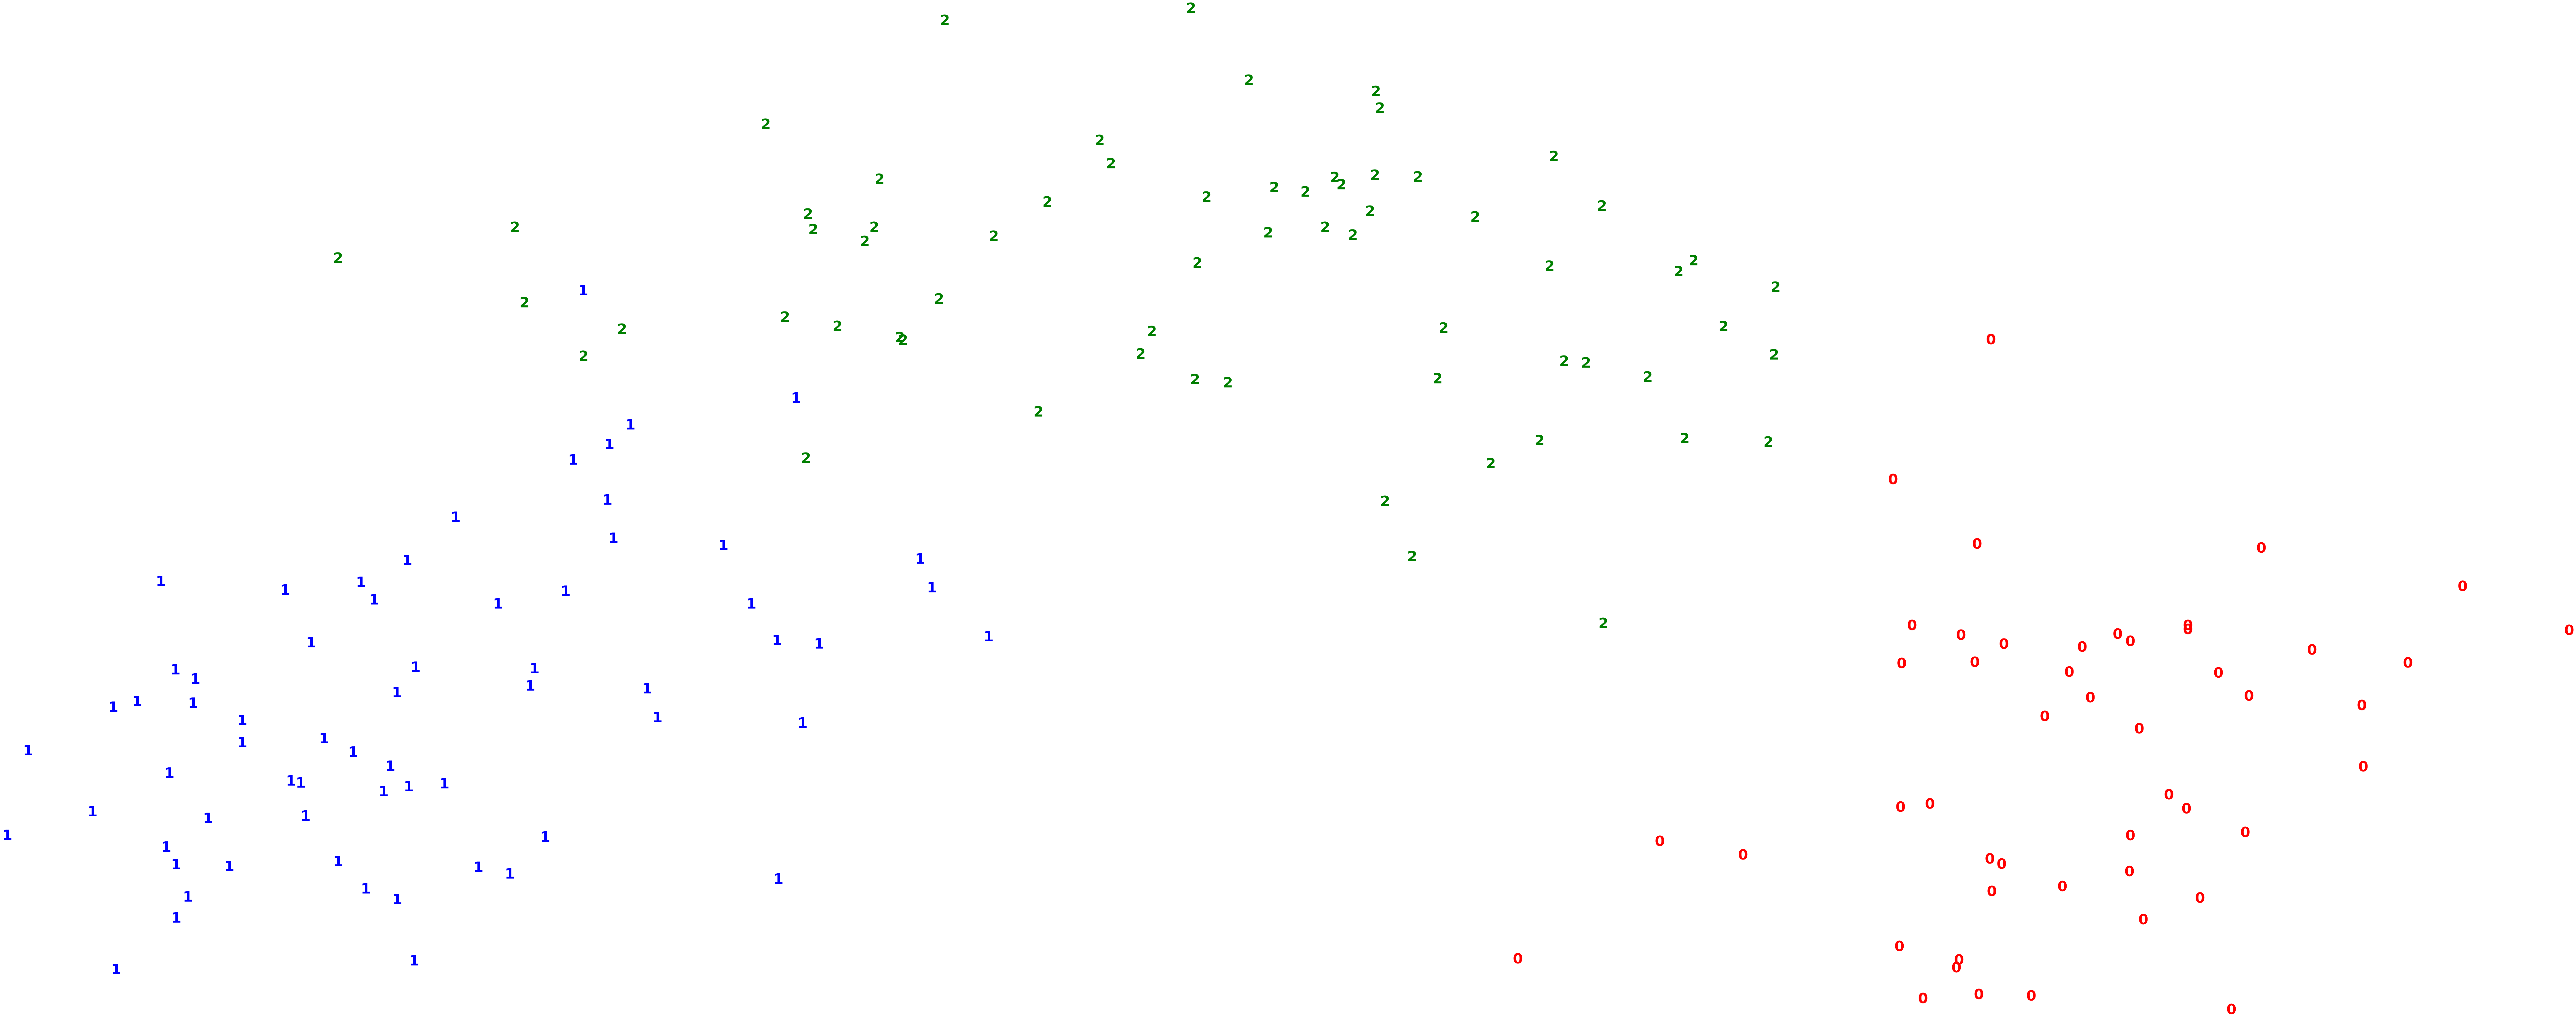

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(facecolor='w', figsize=(20,10))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[clusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print(metrics.silhouette_score(X_std, clusters, metric='euclidean'))

0.29690993830812096


In [ ]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2.5, min_samples=5)

# Fit model
dbclusters = dbscan_cluster.fit_predict(X_std)

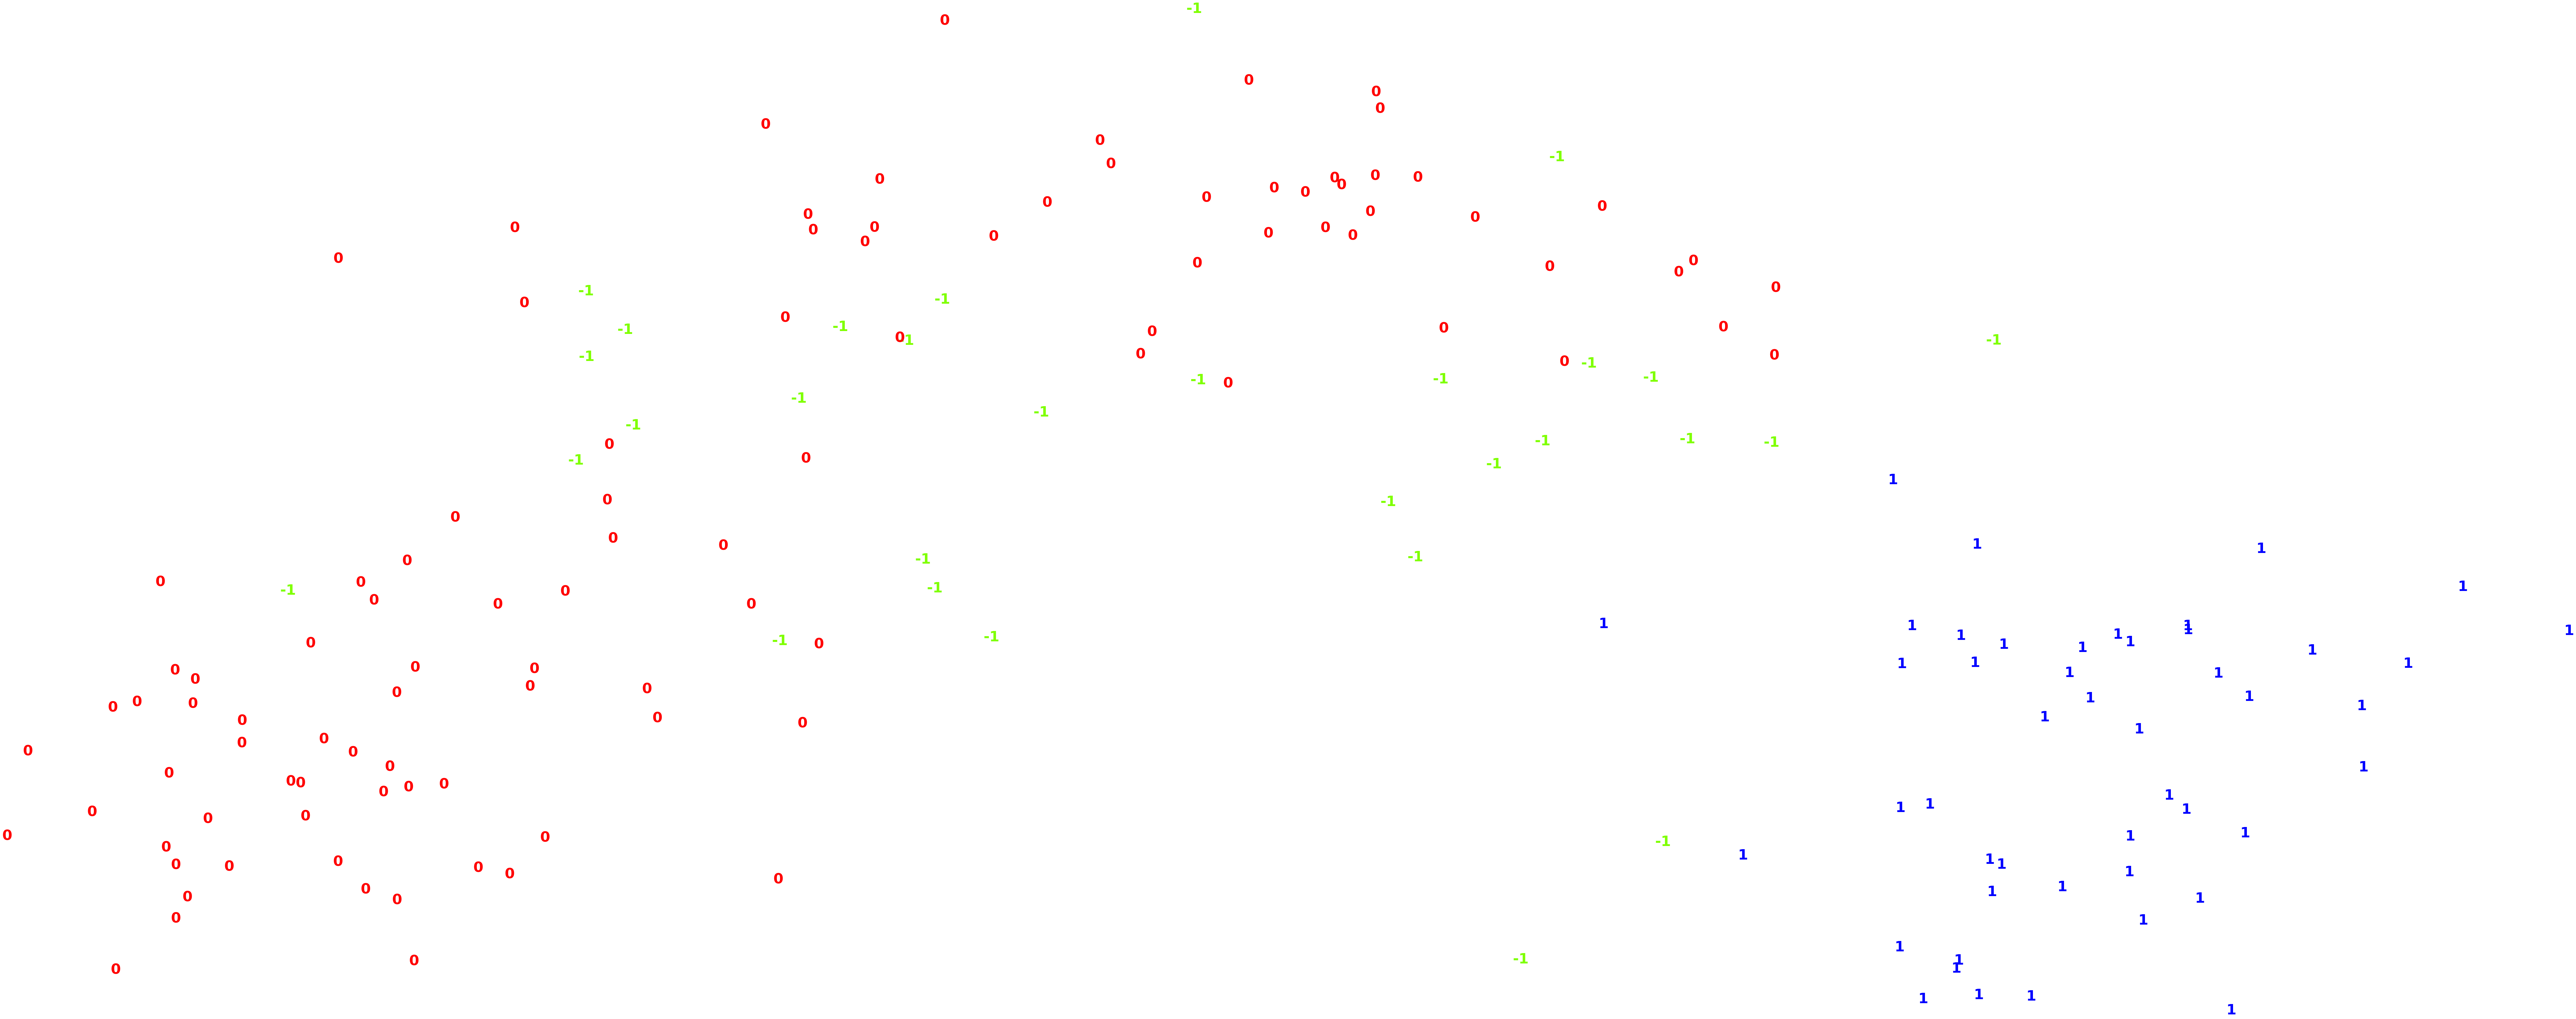

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(facecolor='w', figsize=(20,10))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(dbclusters[i]),
             color=colours[dbclusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print(metrics.silhouette_score(X_std, dbclusters, metric='euclidean'))

0.17443294664111814


In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
gmmclusters = gmm_cluster.fit_predict(X_std)

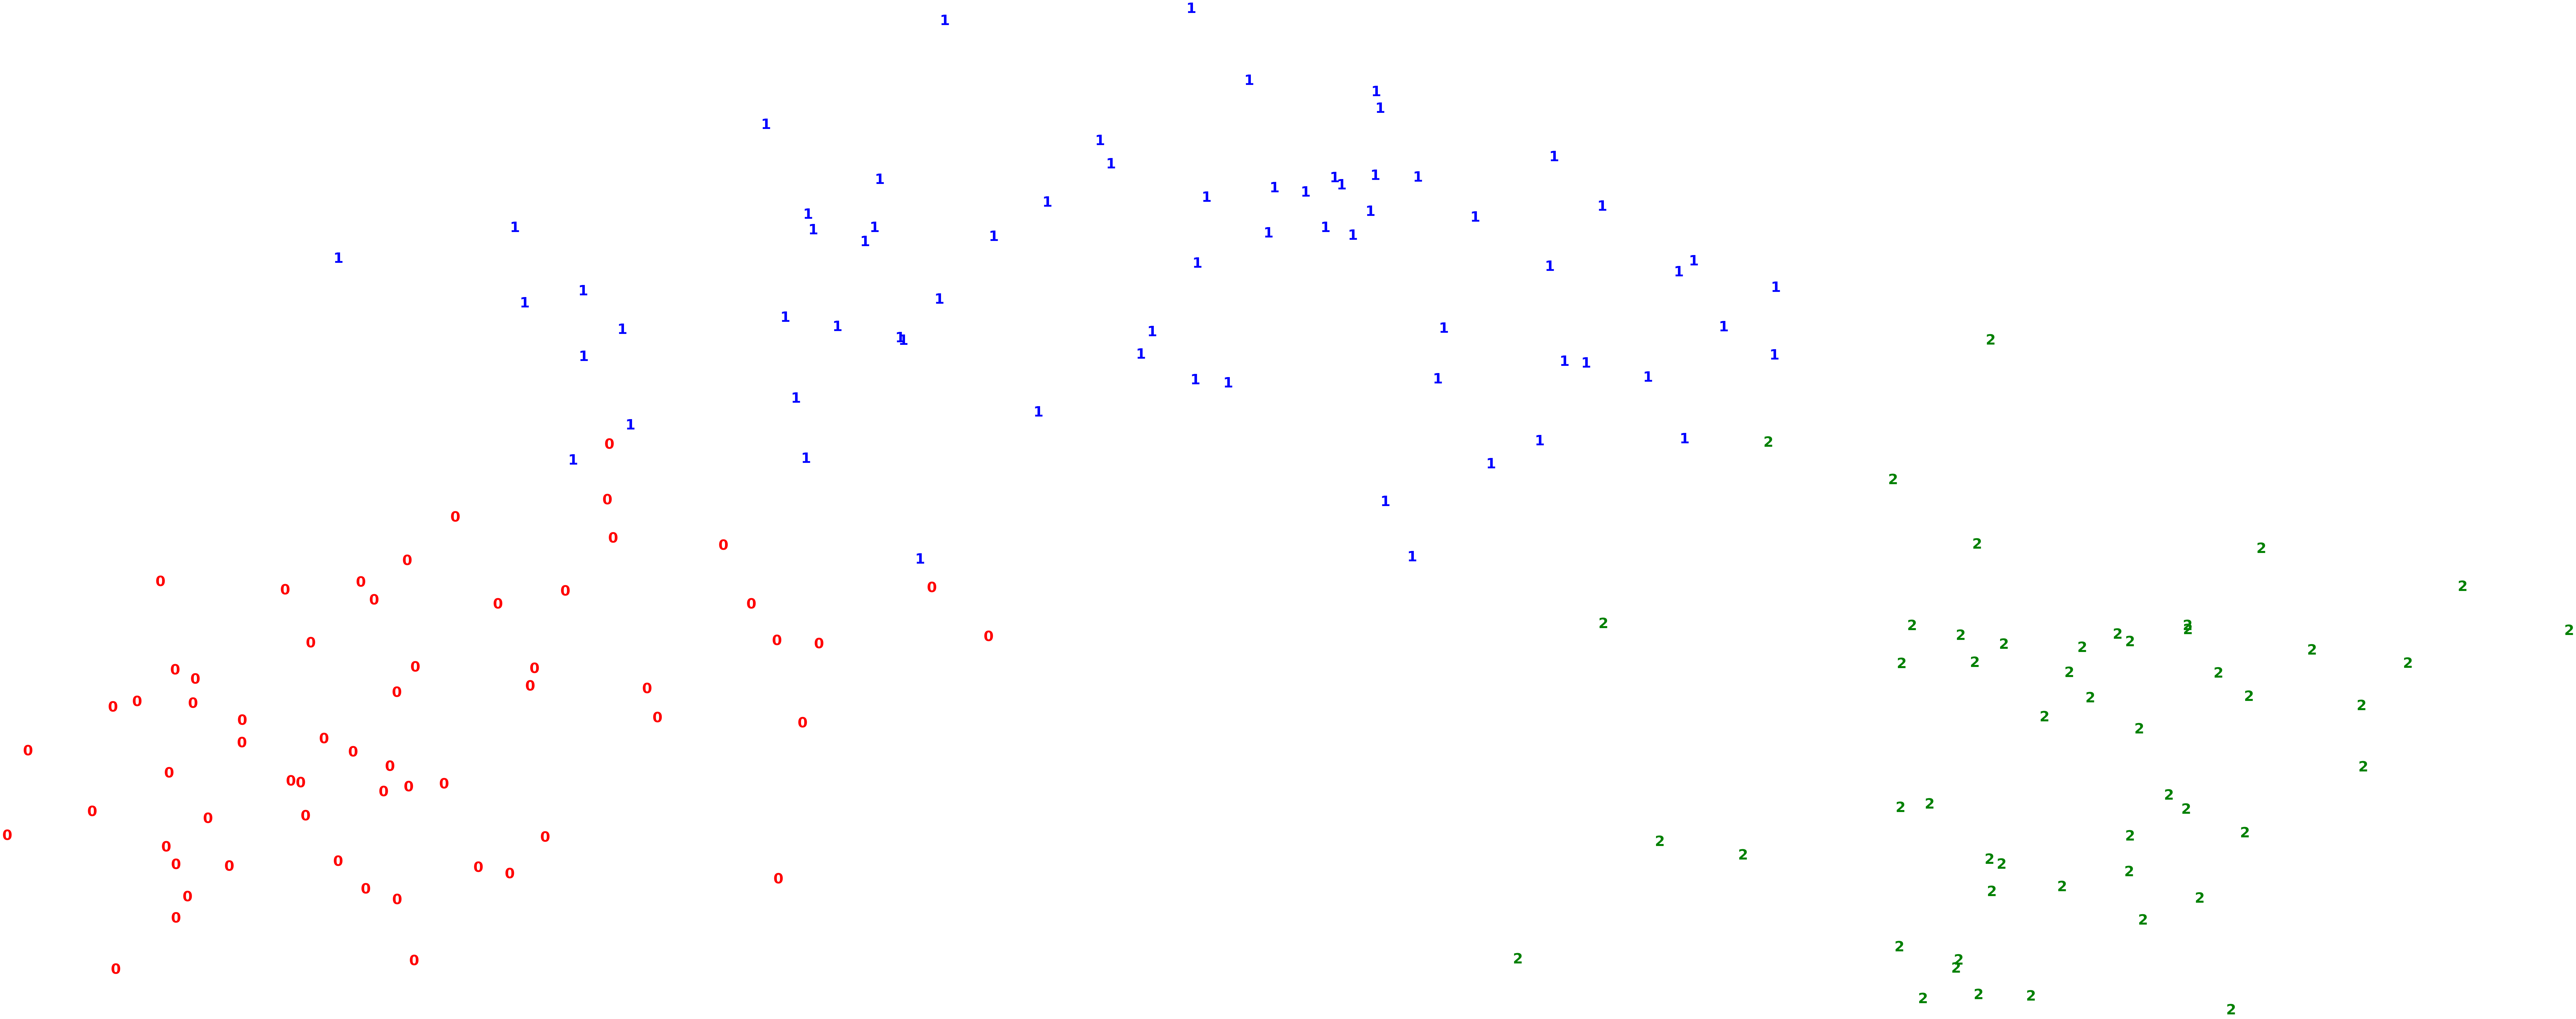

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(facecolor='w', figsize=(20,10))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gmmclusters[i]),
             color=colours[gmmclusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print(metrics.silhouette_score(X_std, gmmclusters, metric='euclidean'))

0.30252550694973934


Now we will run the models again, but this time using only the correlated features that we collected earlier.

In [ ]:
# Defining the k-means
kmeans_cluster_corr = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster_corr.fit(corr_X)
corr_y = kmeans_cluster_corr.predict(corr_X)

22.6 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


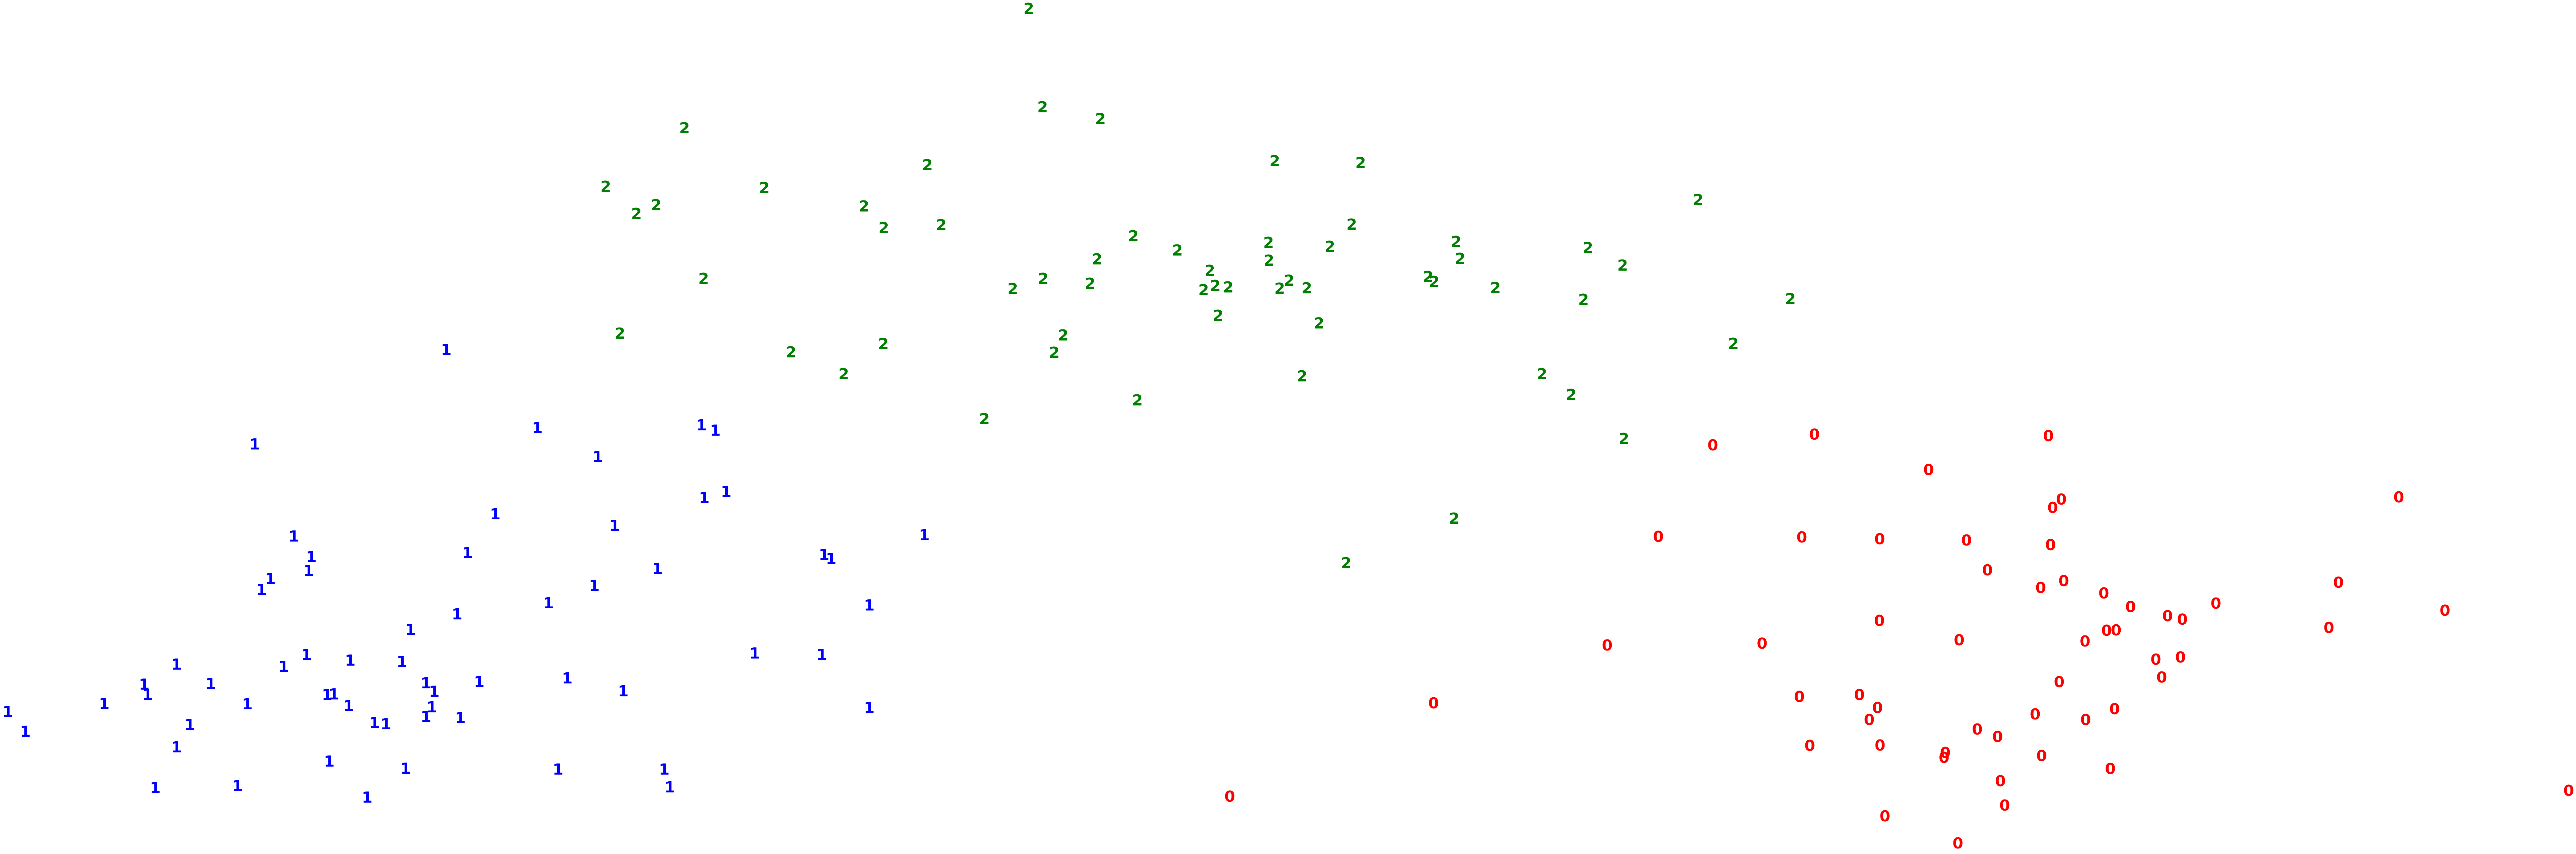

In [ ]:
pca = PCA(n_components=2).fit_transform(corr_X)
plt.figure(facecolor='w', figsize=(20,10))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(corr_y[i]),
             color = colours[corr_y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print(metrics.silhouette_score(corr_X, corr_y, metric='euclidean'))

0.4009621934126858


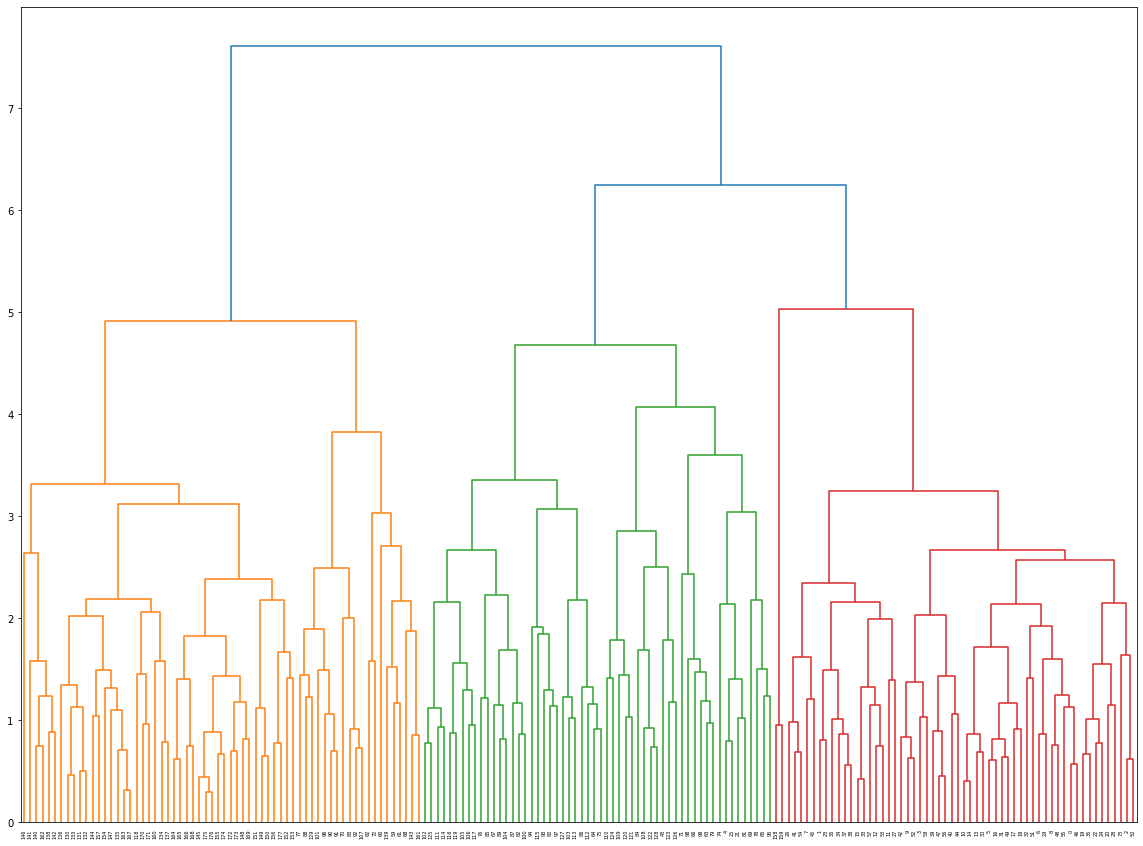

In [ ]:
plt.figure(facecolor='w', figsize=(20,15))
dendrogram(linkage(corr_X, method='complete'))
plt.show()

In [ ]:
# Defining the agglomerative clustering
agg_cluster_corr = AgglomerativeClustering(linkage='average',
                                      affinity='euclidean',
                                      n_clusters= 3)

# Fit model
clusters_corr = agg_cluster_corr.fit_predict(corr_X)

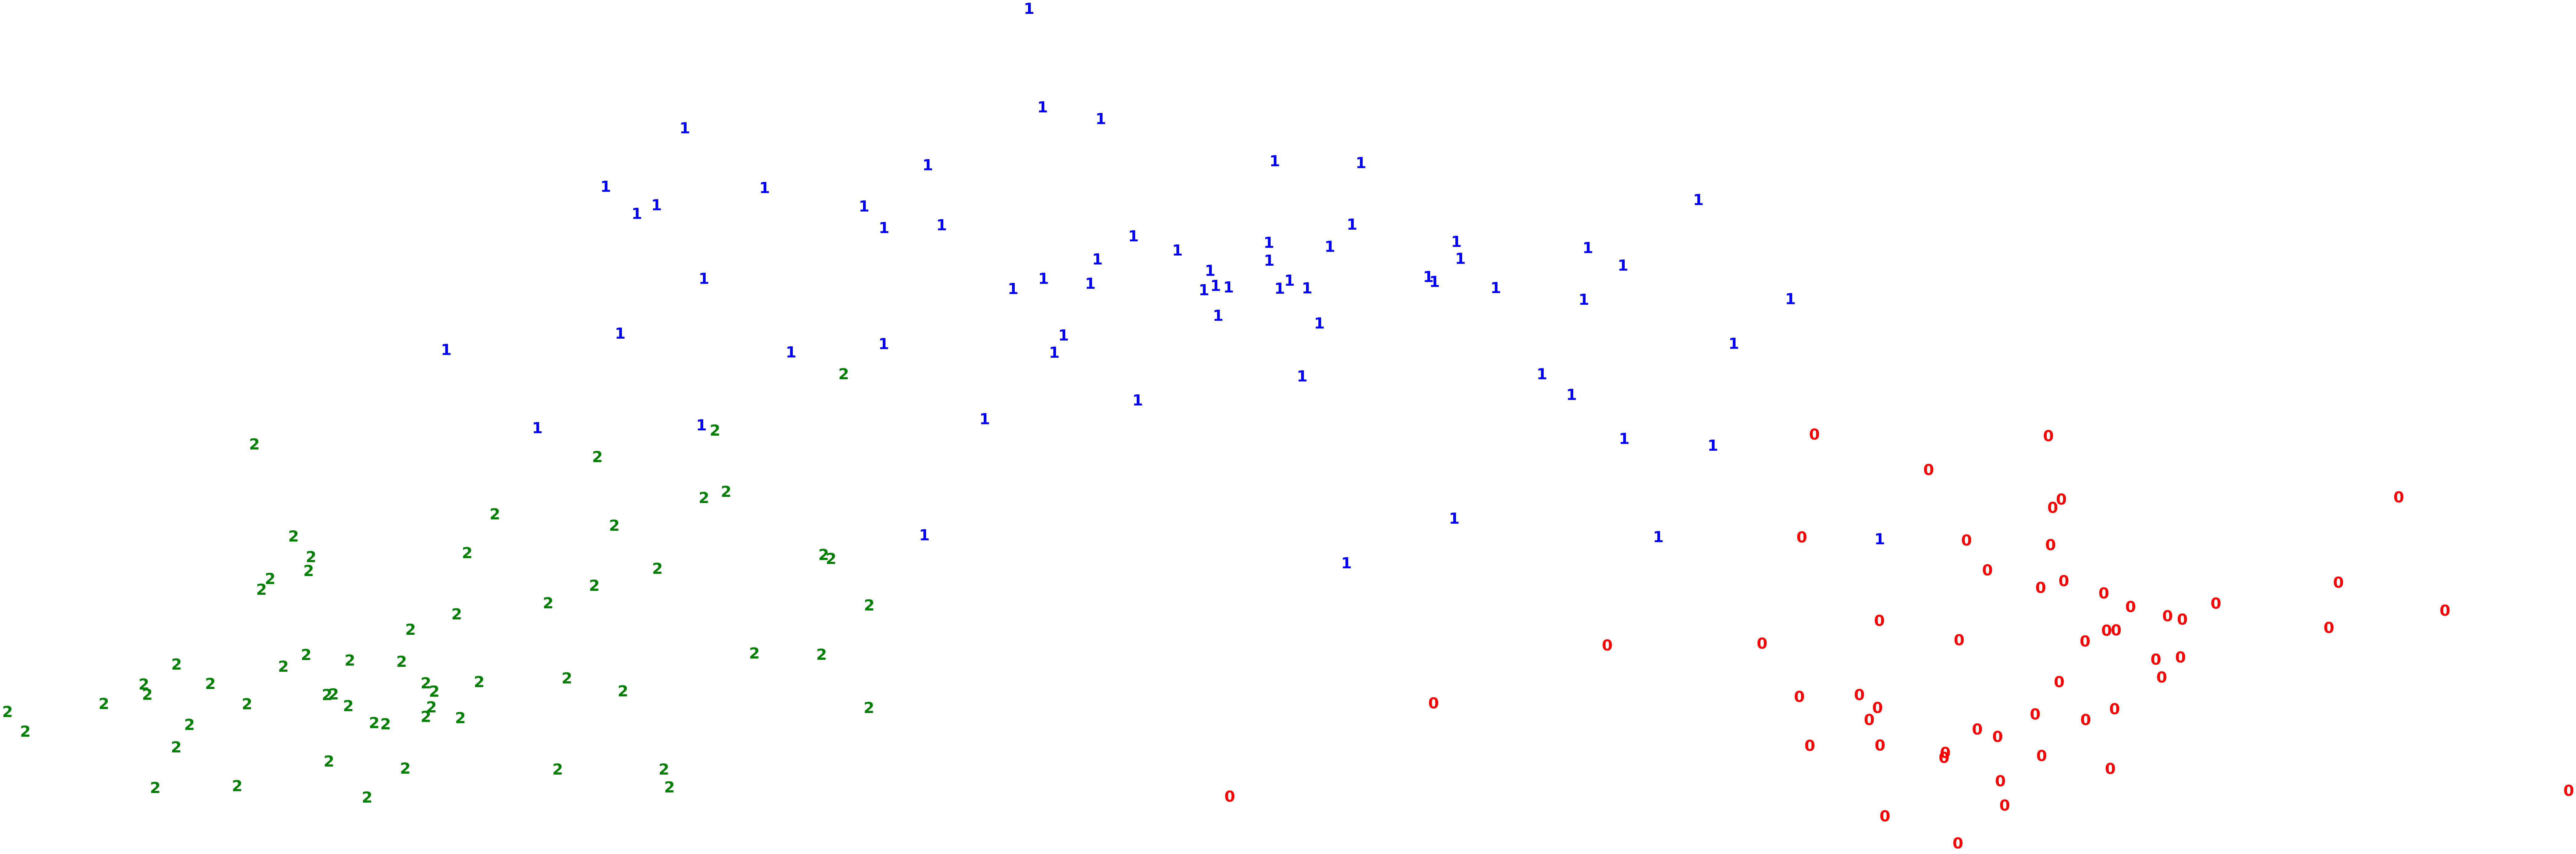

In [ ]:
pca = PCA(n_components=2).fit_transform(corr_X)

plt.figure(facecolor='w', figsize=(20,10))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_corr[i]),
             color=colours[clusters_corr[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print(metrics.silhouette_score(corr_X, clusters_corr, metric='euclidean'))

0.3877404933955382


In [ ]:
# Defining the agglomerative clustering
dbscan_cluster2 = DBSCAN(eps=1.5, min_samples=6)

# Fit model
dbclusters_corr = dbscan_cluster2.fit_predict(corr_X)

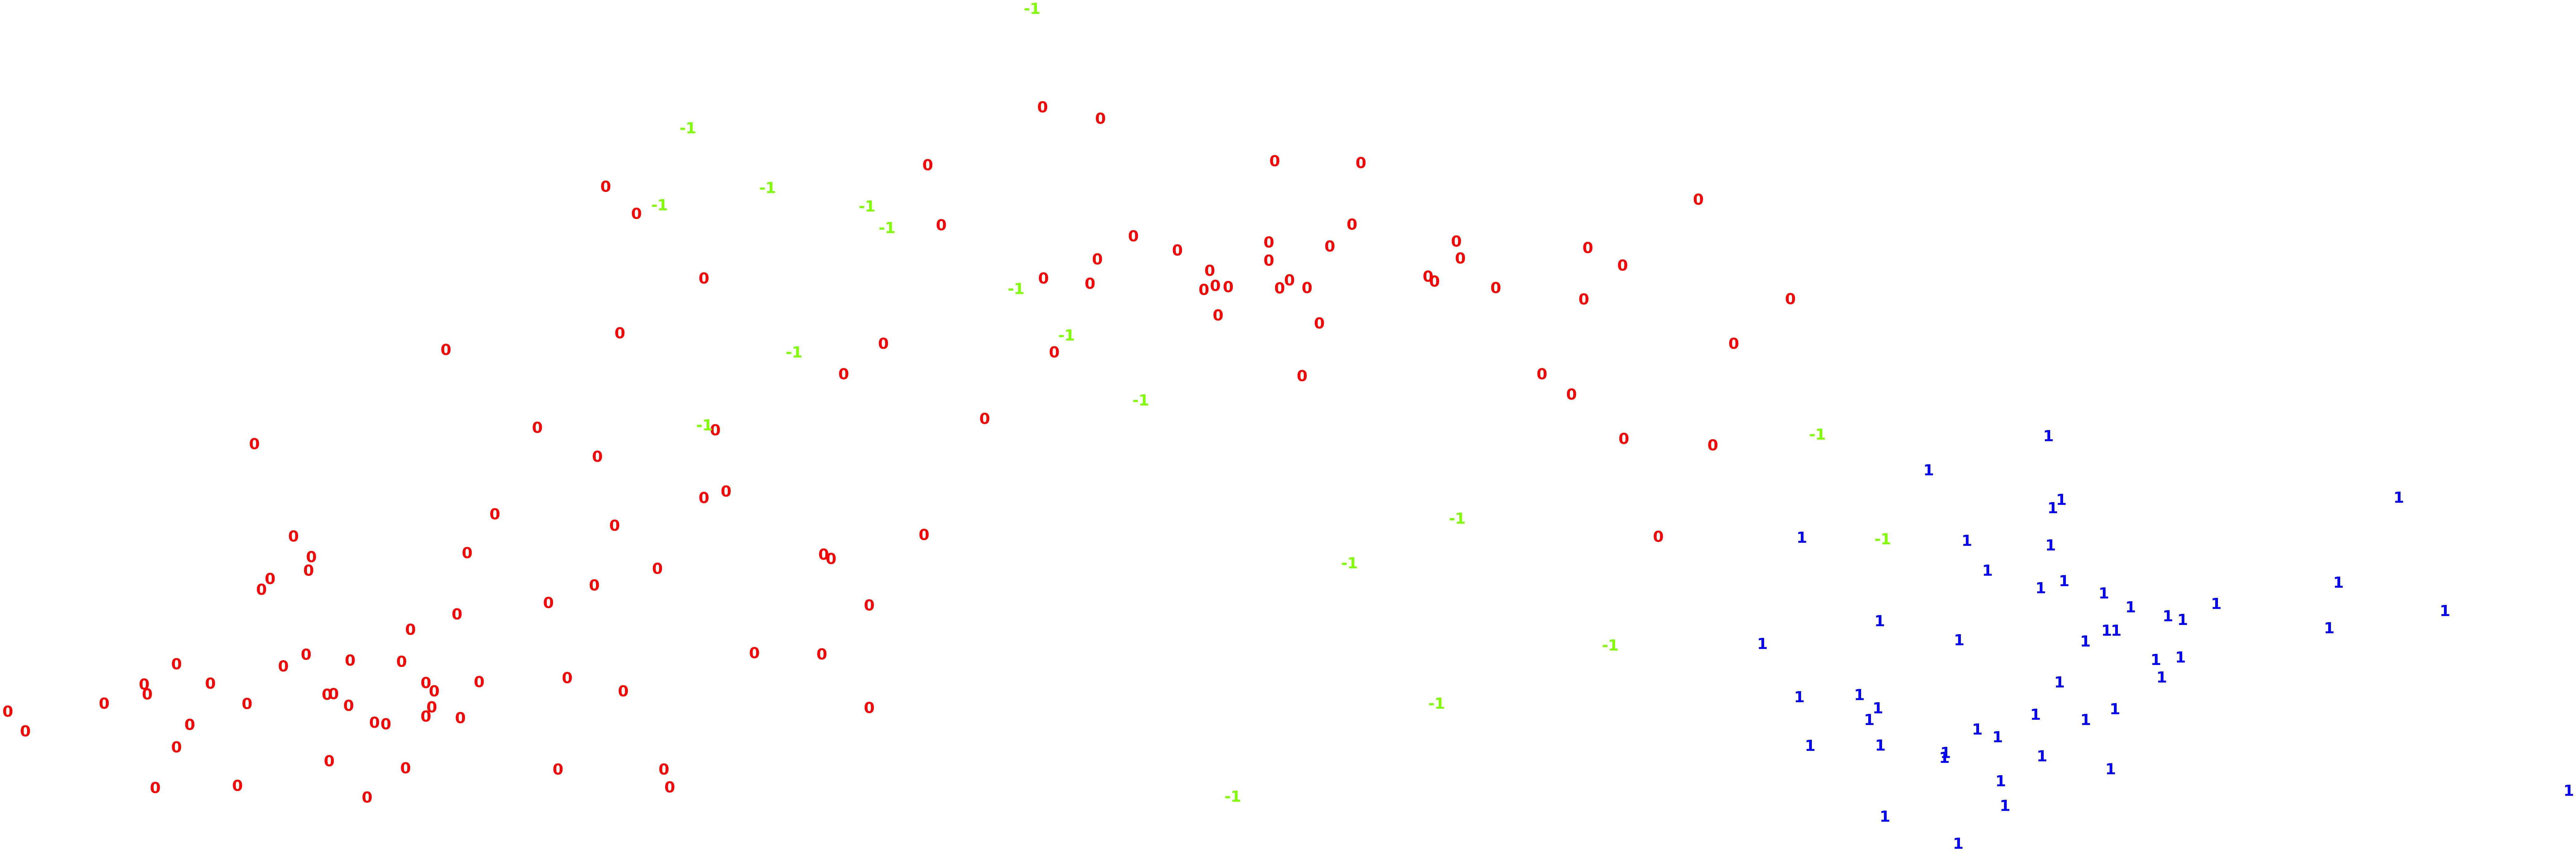

In [ ]:
pca = PCA(n_components=2).fit_transform(corr_X)

plt.figure(facecolor='w', figsize=(20,10))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(dbclusters_corr[i]),
             color=colours[dbclusters_corr[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print(metrics.silhouette_score(corr_X, dbclusters_corr, metric='euclidean'))

0.24015122046638968


In [ ]:
# Defining the agglomerative clustering
gmm_cluster2 = GaussianMixture(n_components=3, random_state=123)

# Fit model
gmmclusters_corr = gmm_cluster2.fit_predict(corr_X)

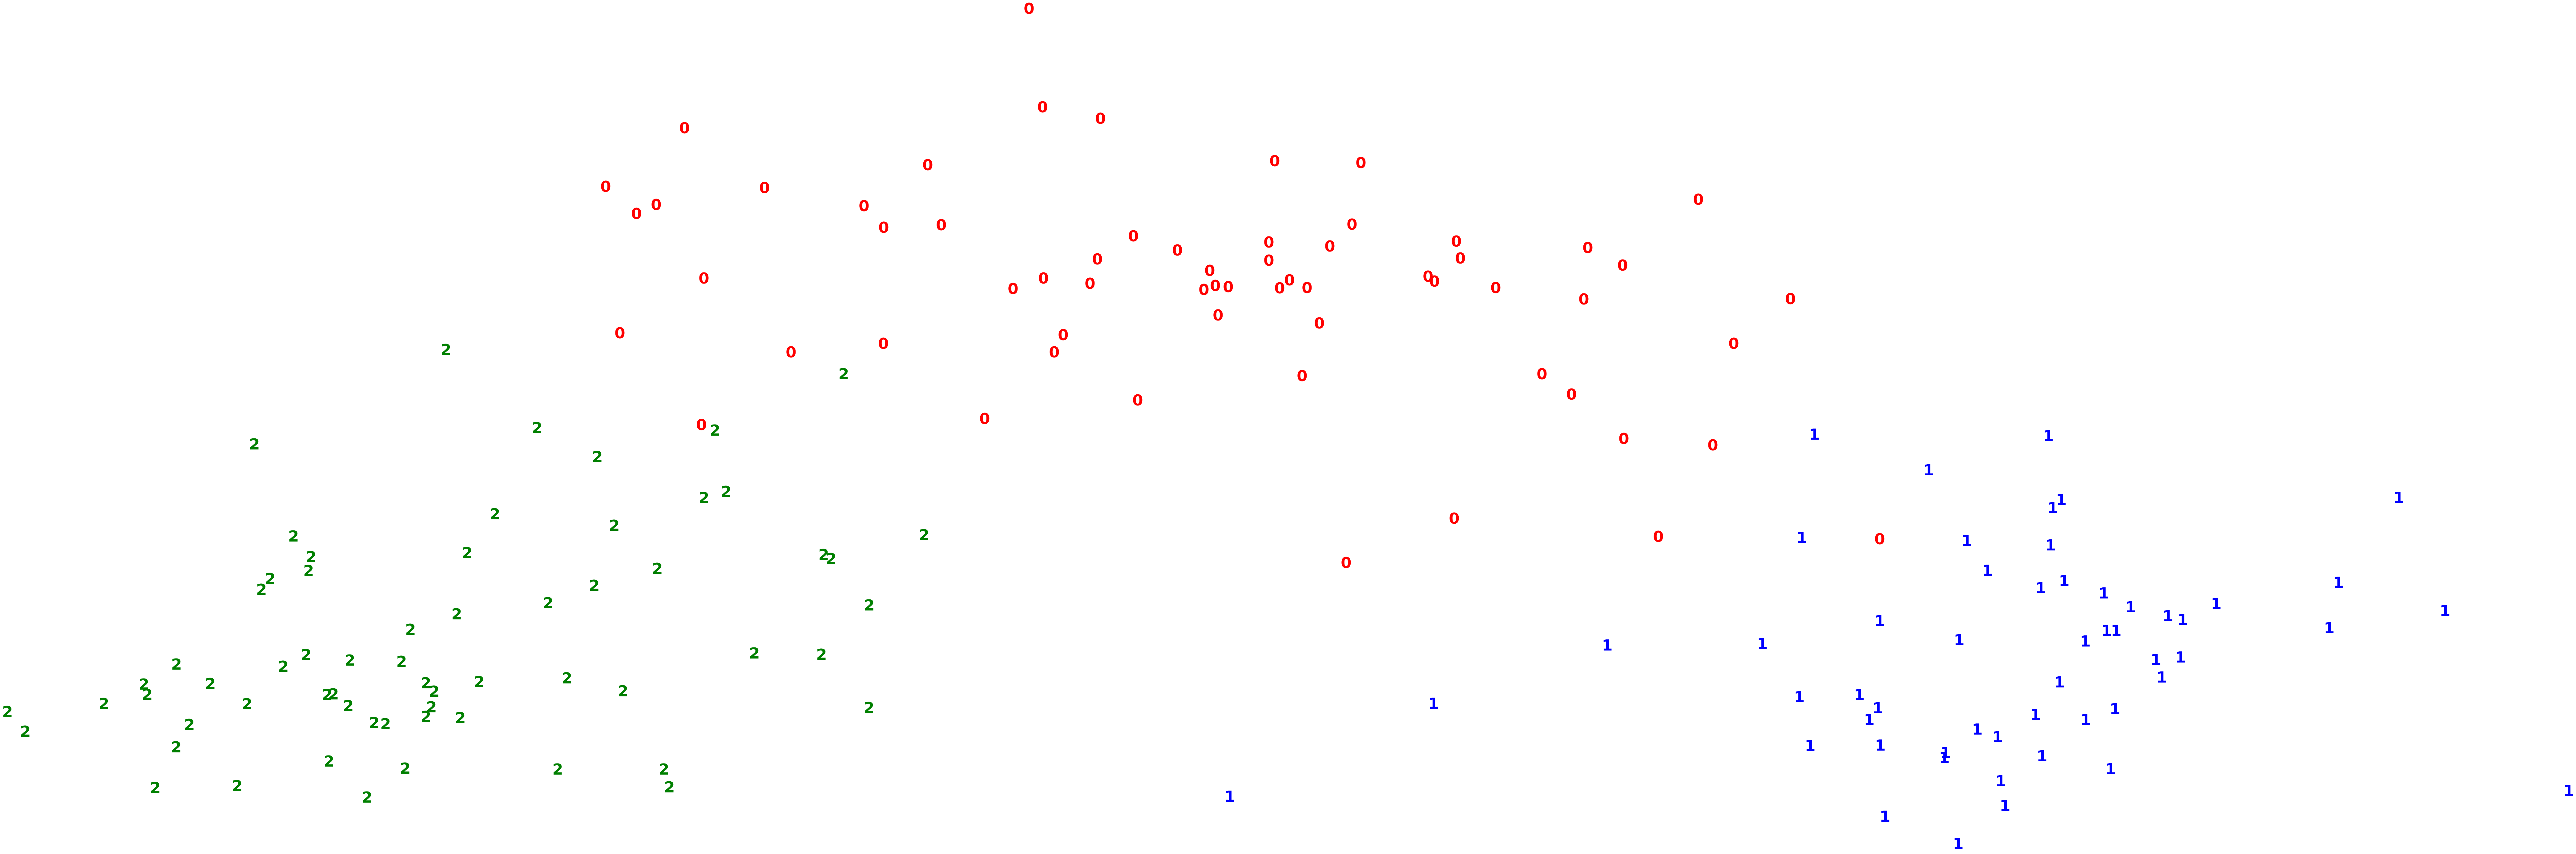

In [ ]:
pca = PCA(n_components=2).fit_transform(corr_X)

plt.figure(facecolor='w', figsize=(20,10))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gmmclusters_corr[i]),
             color=colours[gmmclusters_corr[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print(metrics.silhouette_score(corr_X, gmmclusters_corr, metric='euclidean'))

0.39150611959101717


Now we are going to run UMAP with the models instead of PCA.

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=6,
                      min_dist=0.4,
                      metric='correlation').fit_transform(corr_X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 10.144671201705933 seconds


UMAP RESULTS =>

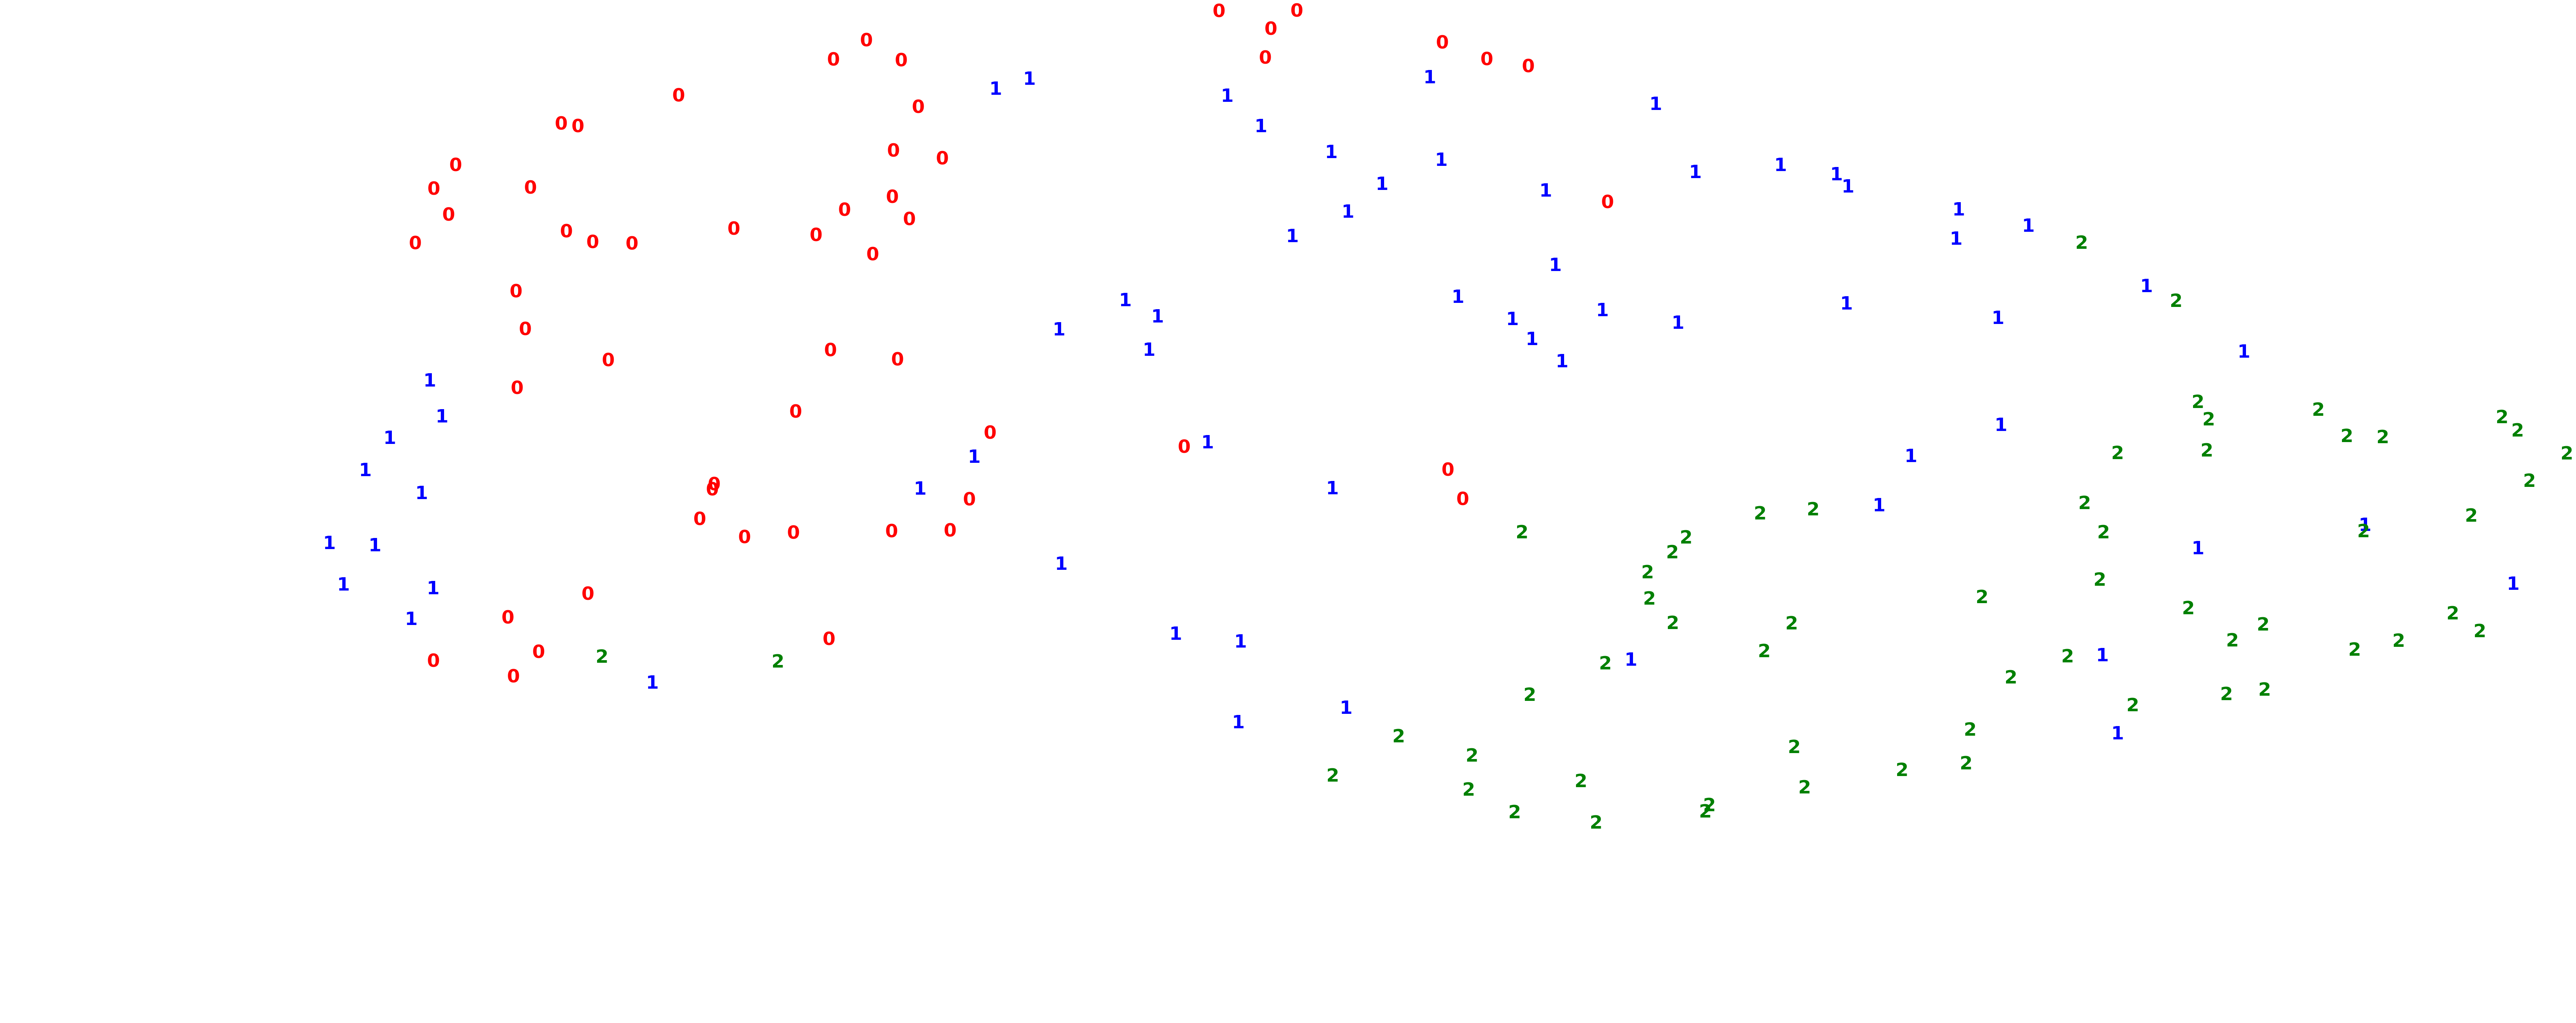

In [ ]:
plt.figure(facecolor='w', figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], corr_y[i],
             color=colours[int(corr_y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

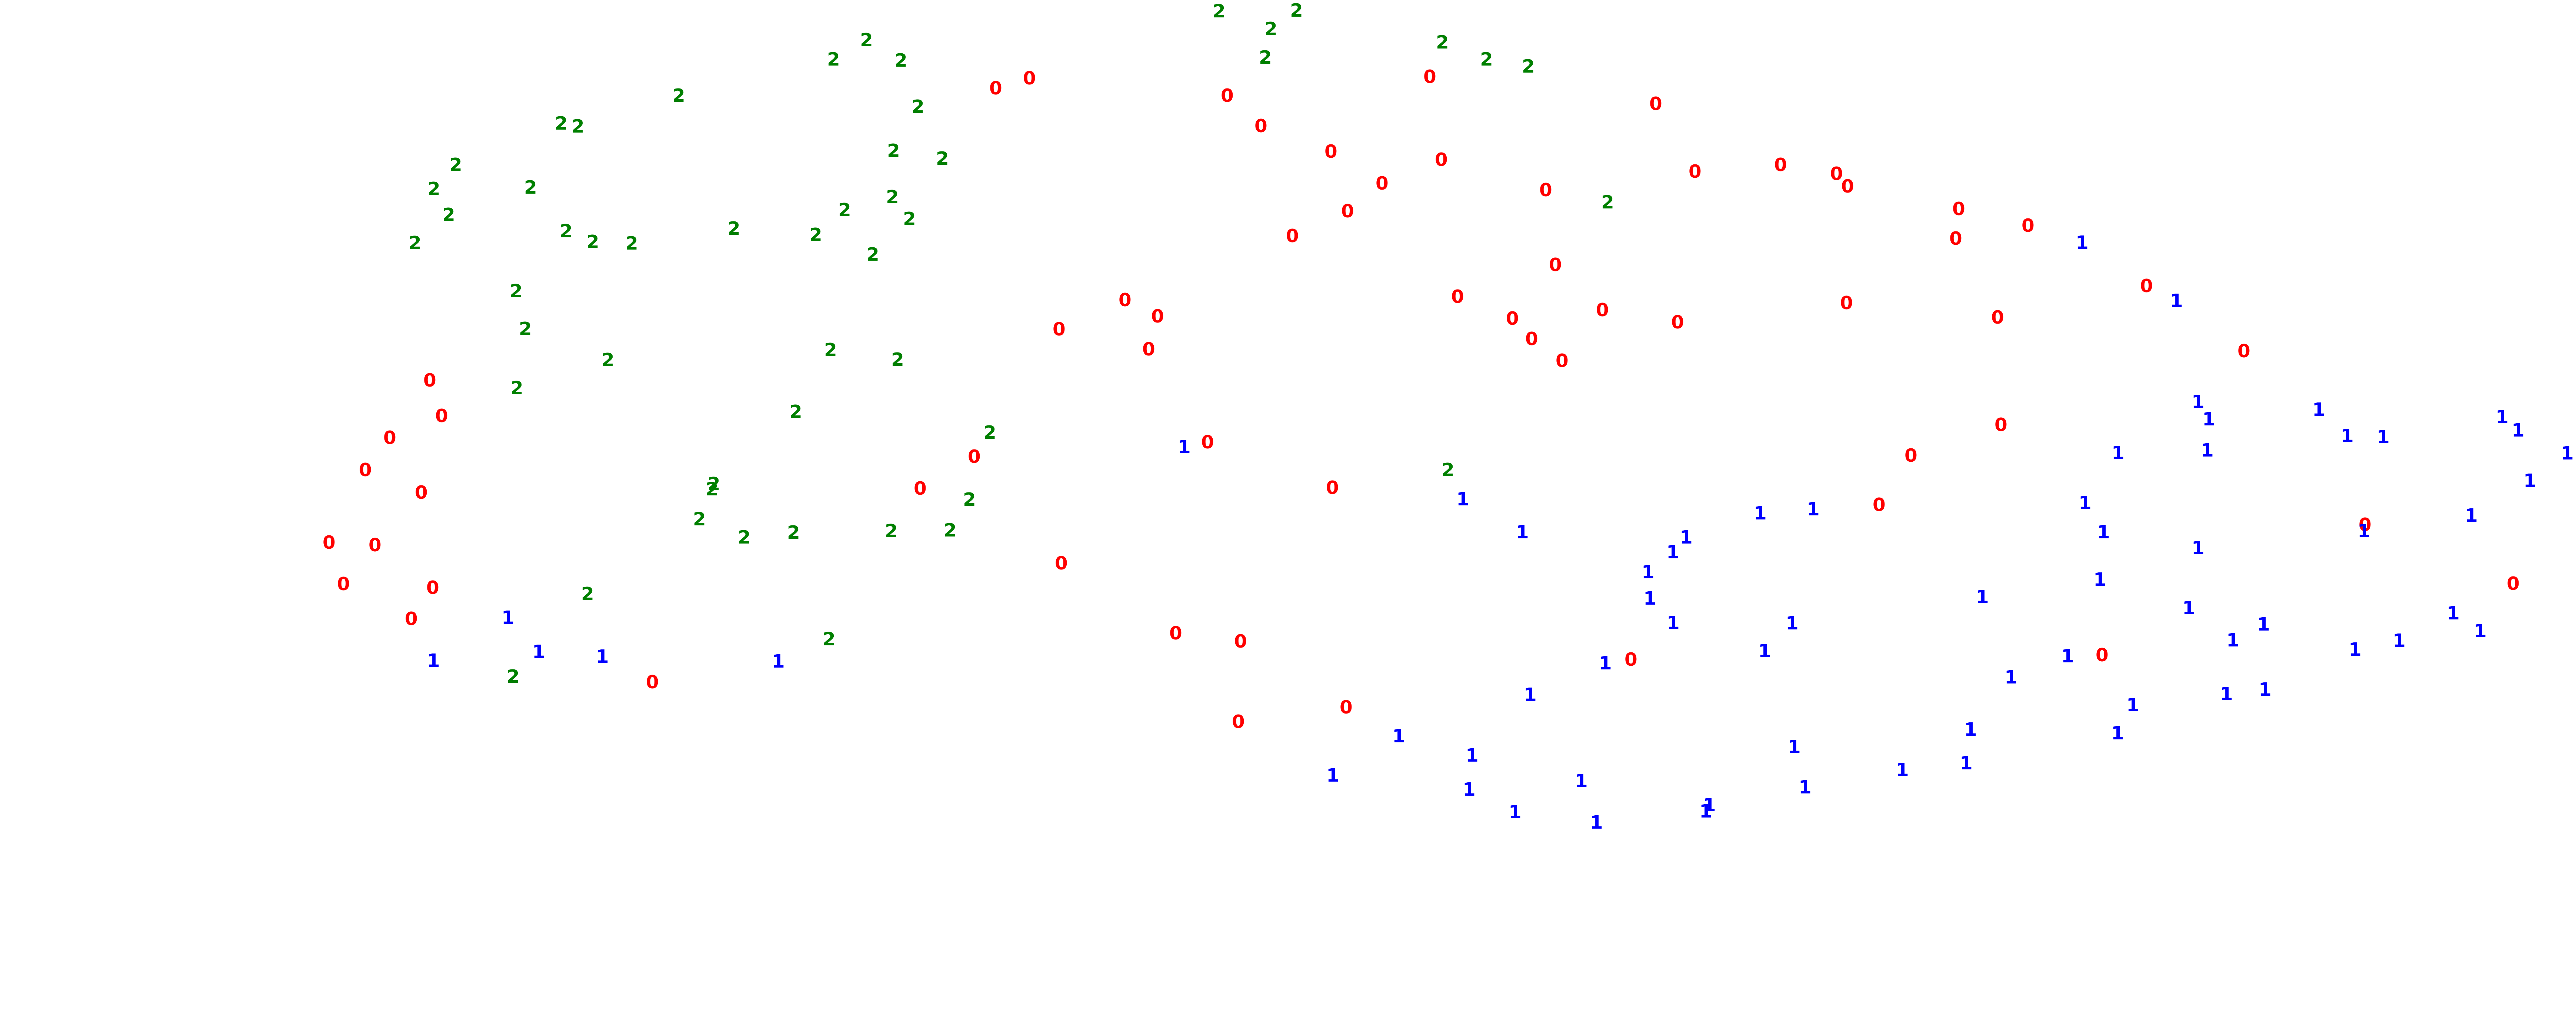

In [ ]:
plt.figure(facecolor='w', figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y_pred[i],
             color=colours[int(y_pred[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

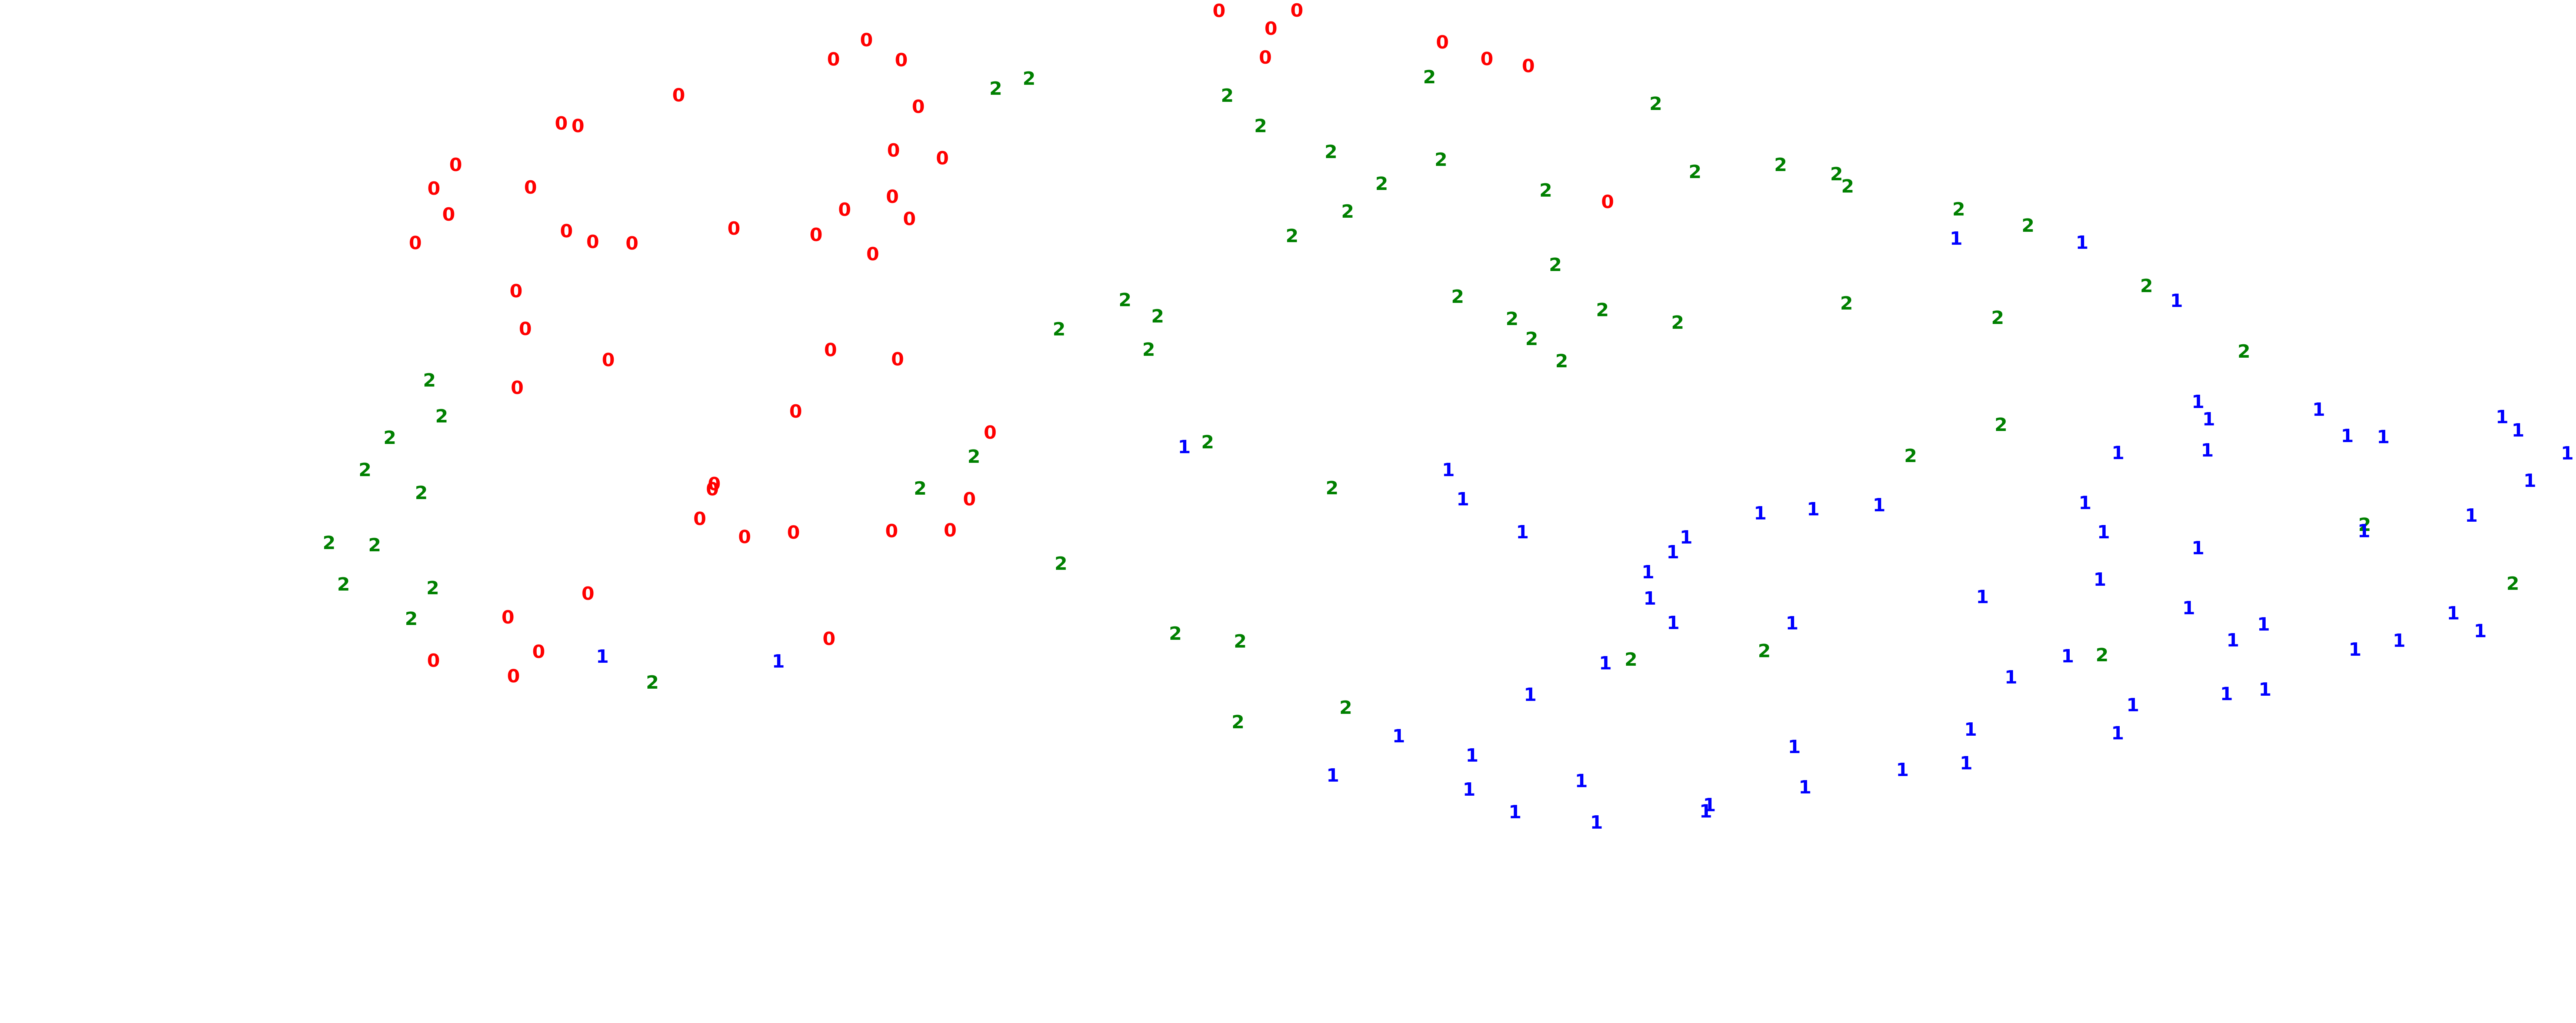

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], clusters_corr[i],
             color=colours[int(clusters_corr[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

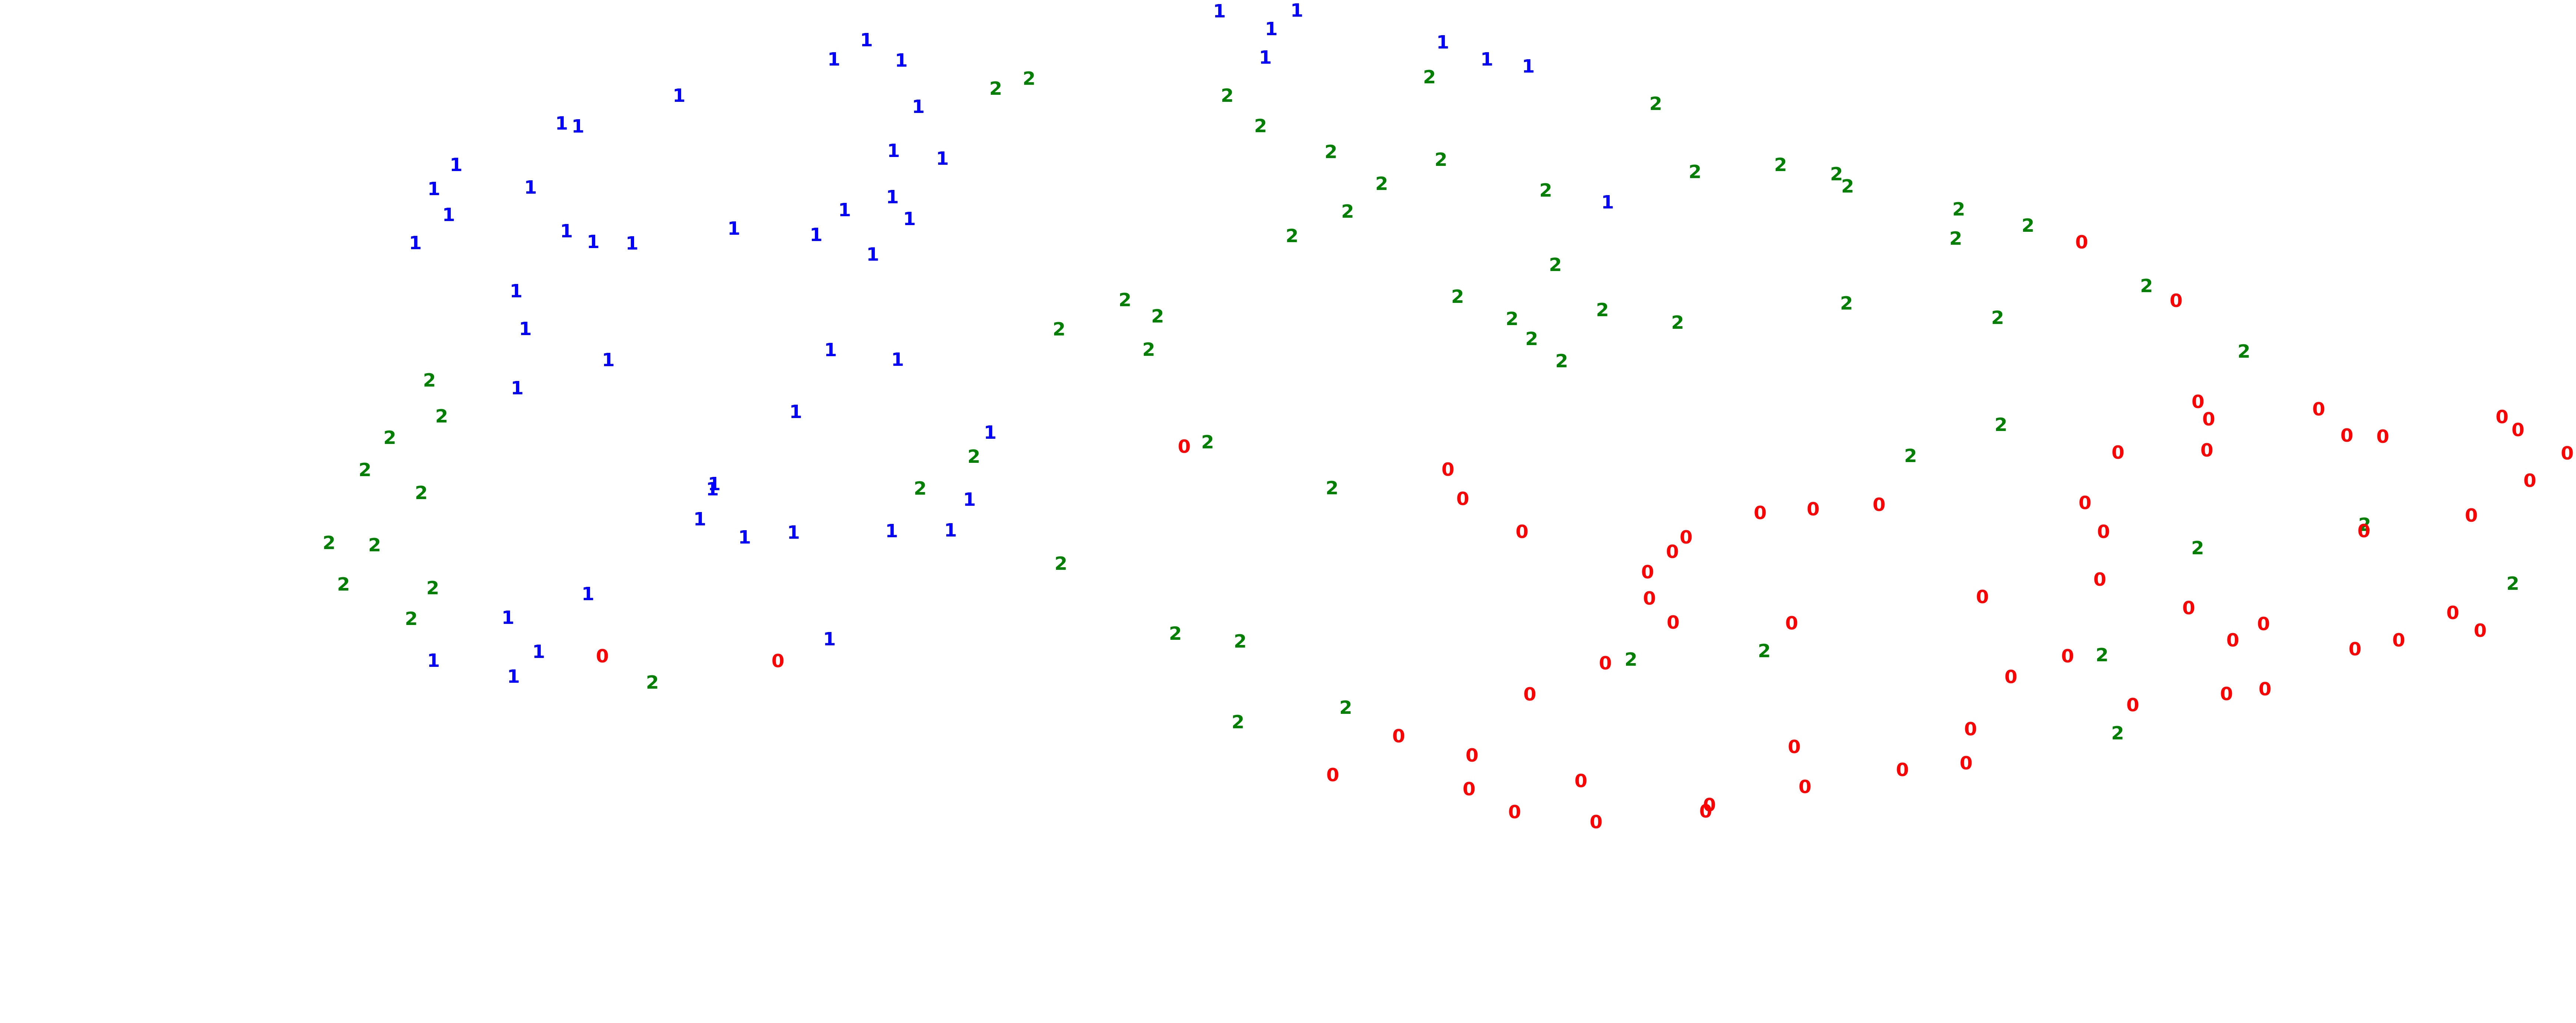

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], gmmclusters_corr[i],
             color=colours[int(gmmclusters_corr[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

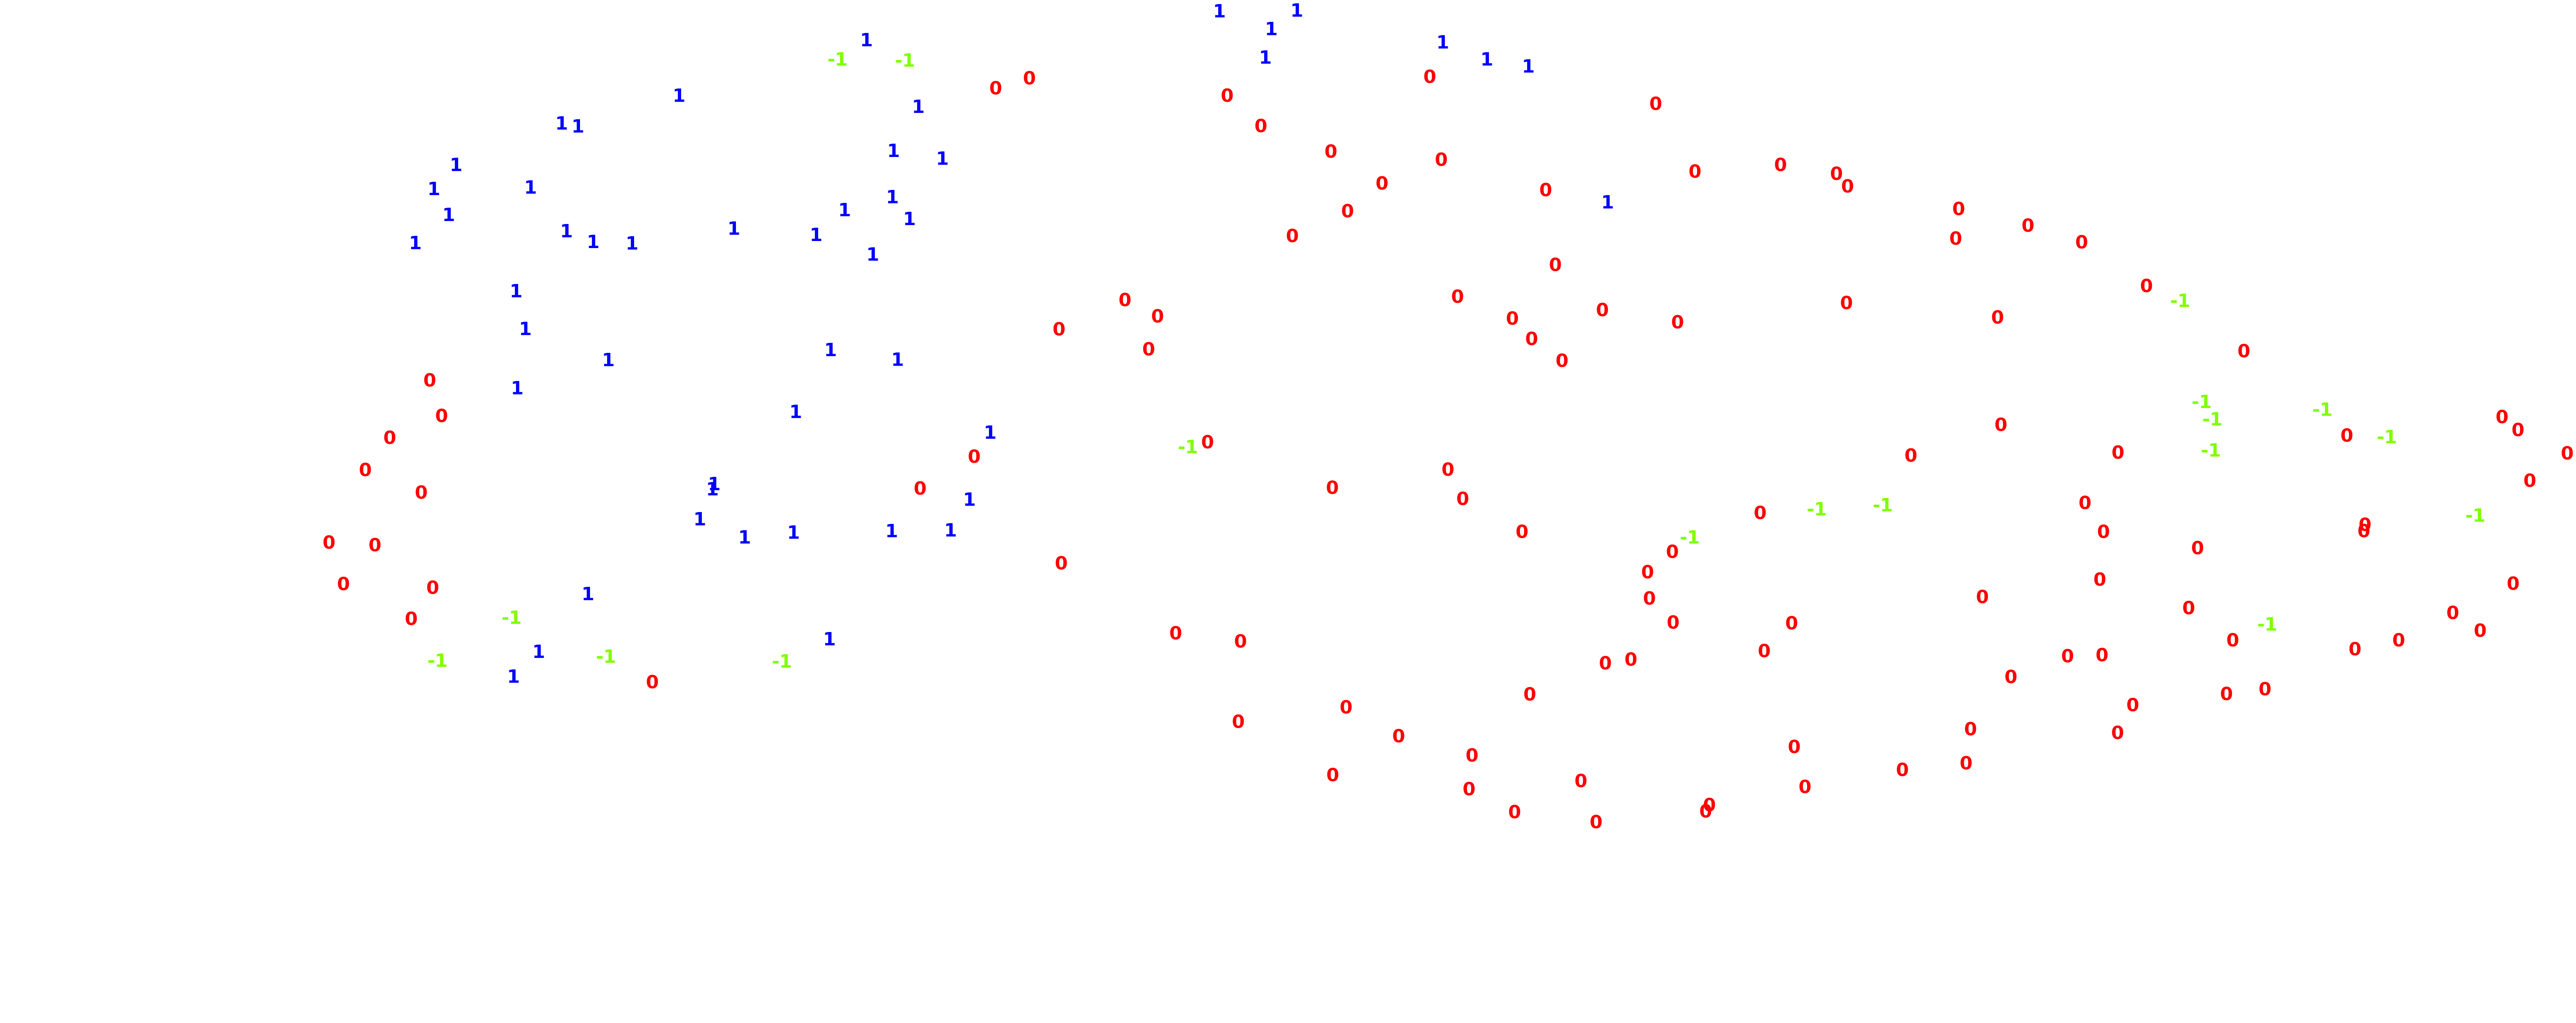

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], dbclusters_corr[i],
             color=colours[int(dbclusters_corr[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Here we will do the same thing as above, but this time using the TSNE technique.

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1.5, perplexity=60, n_iter=300)
tsne_results = tsne.fit_transform(corr_X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.637513
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.724457
[t-SNE] KL divergence after 300 iterations: 0.172033
t-SNE done! Time elapsed: 0.5022814273834229 seconds


TSNE RESULTS =>

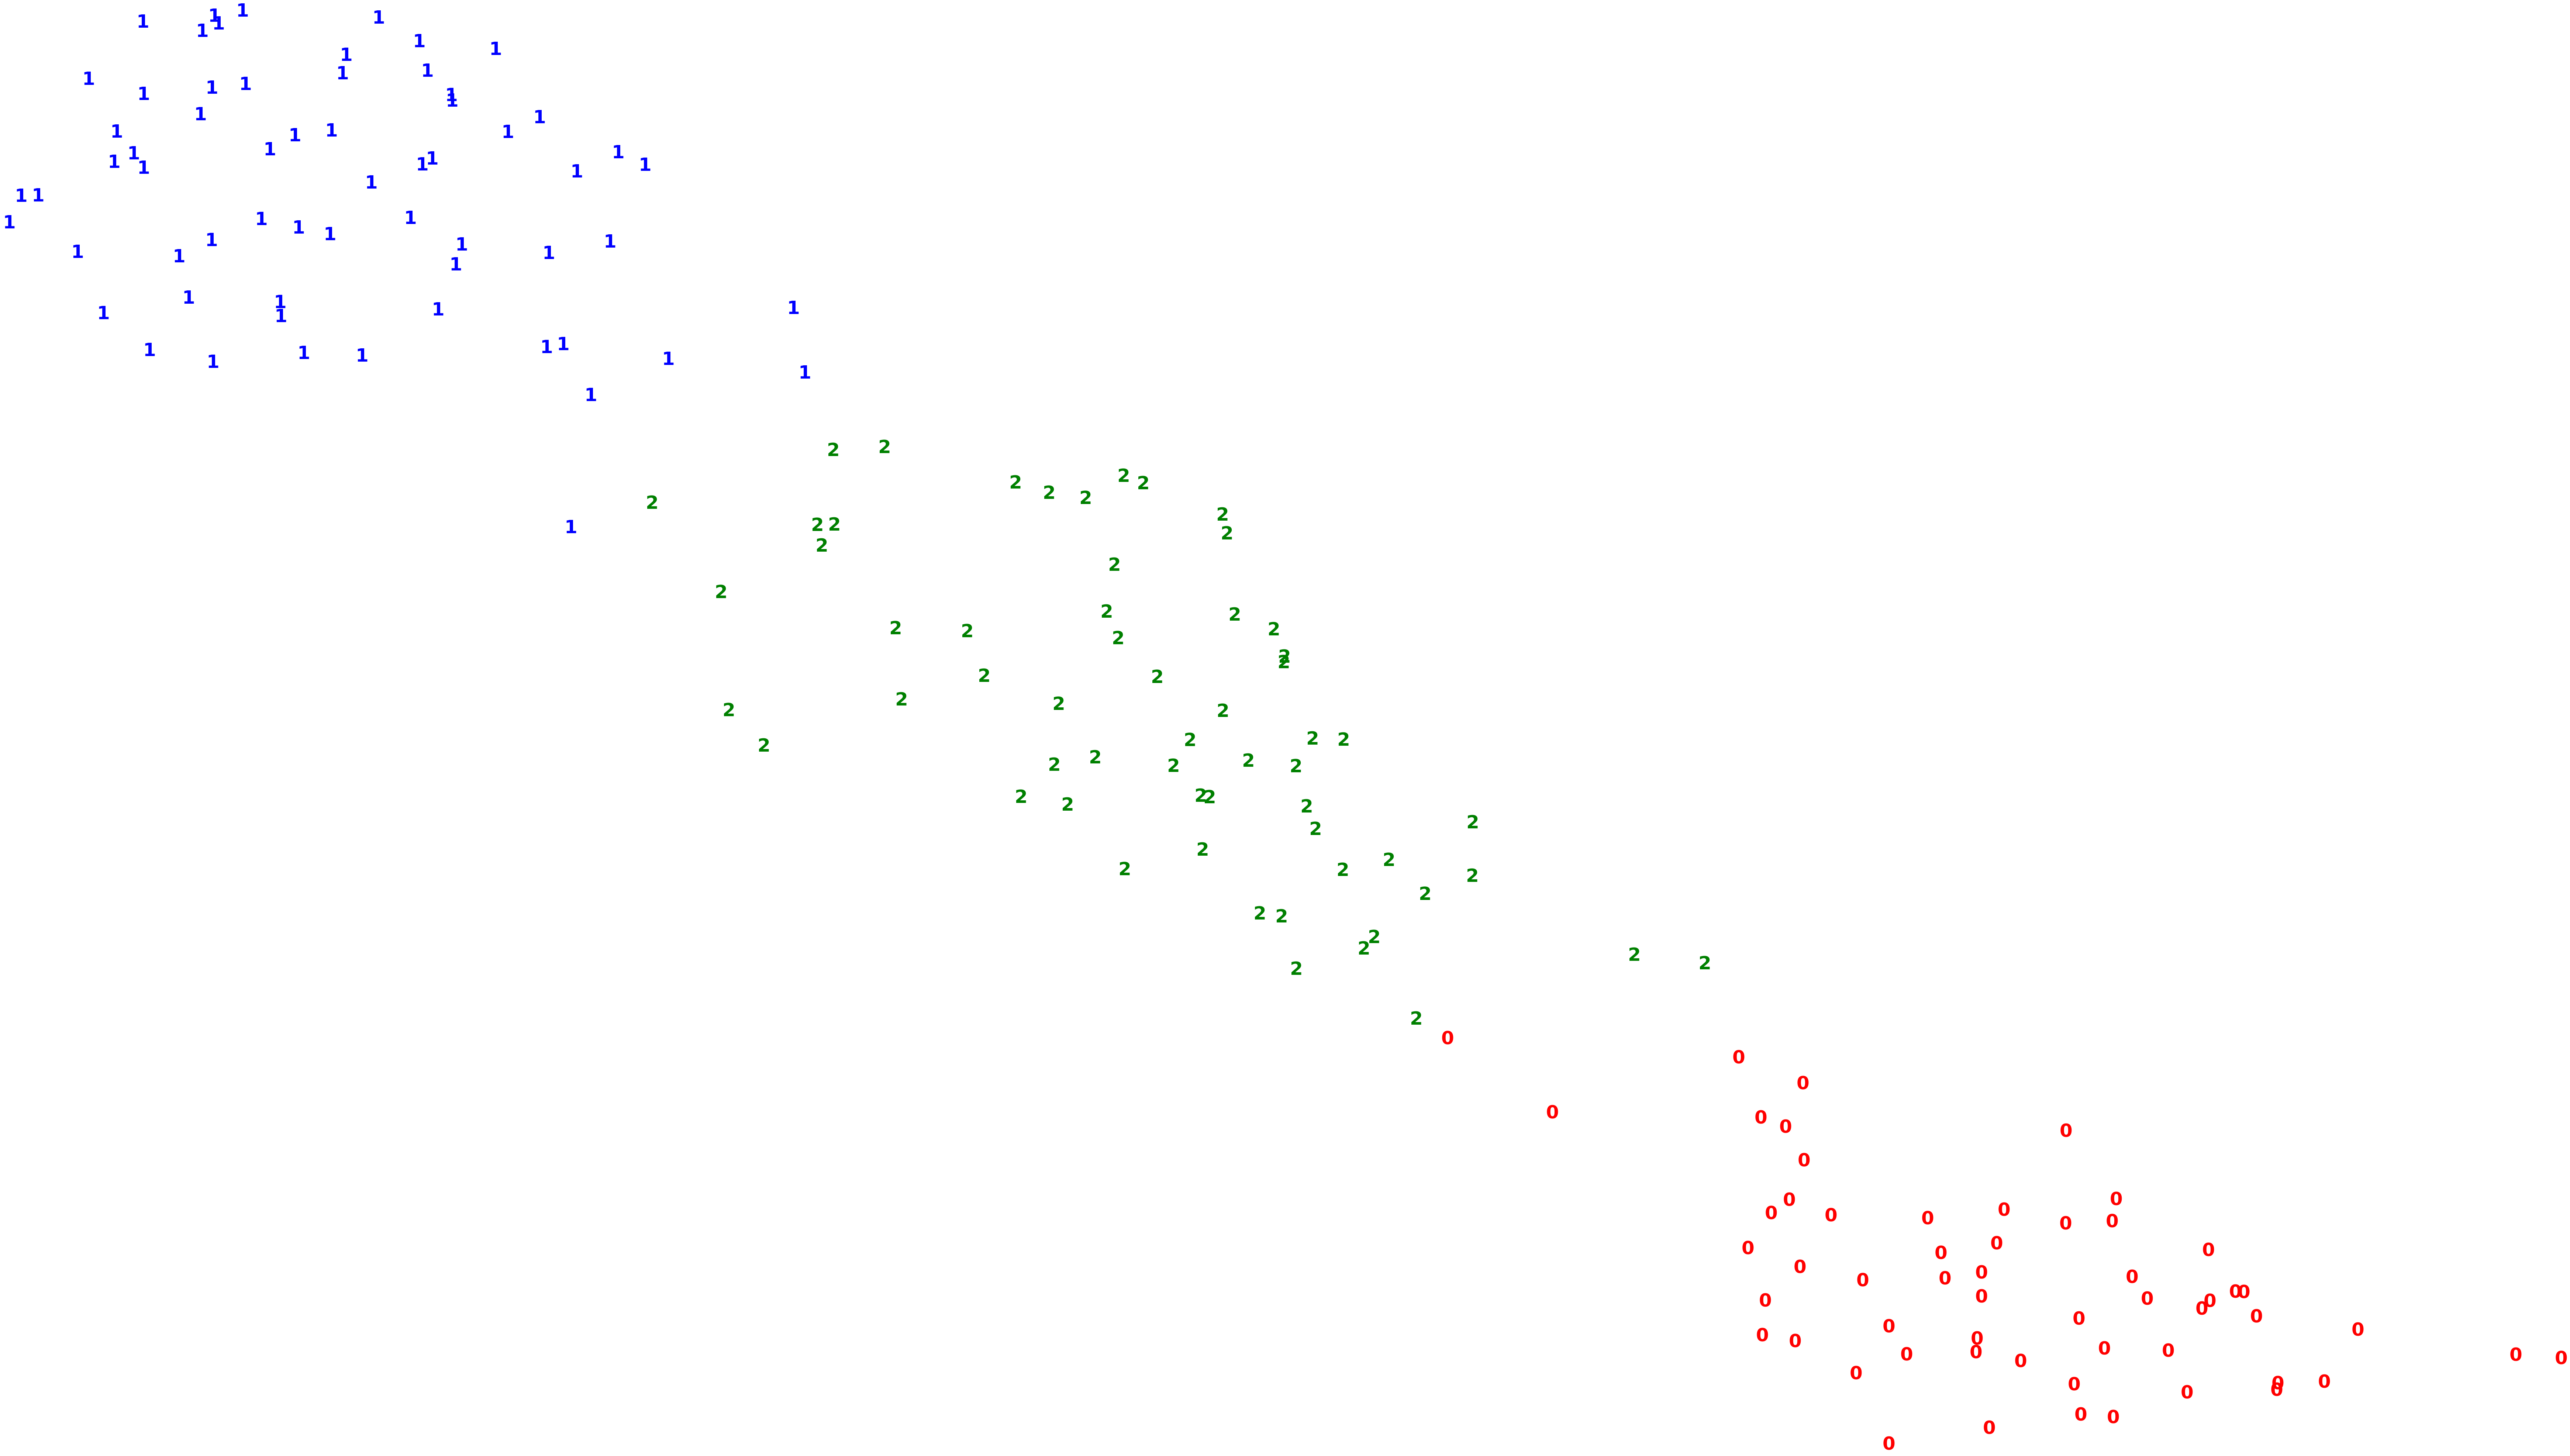

In [ ]:
plt.figure(facecolor='w', figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(corr_y[i]),
             color=colours[int(corr_y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

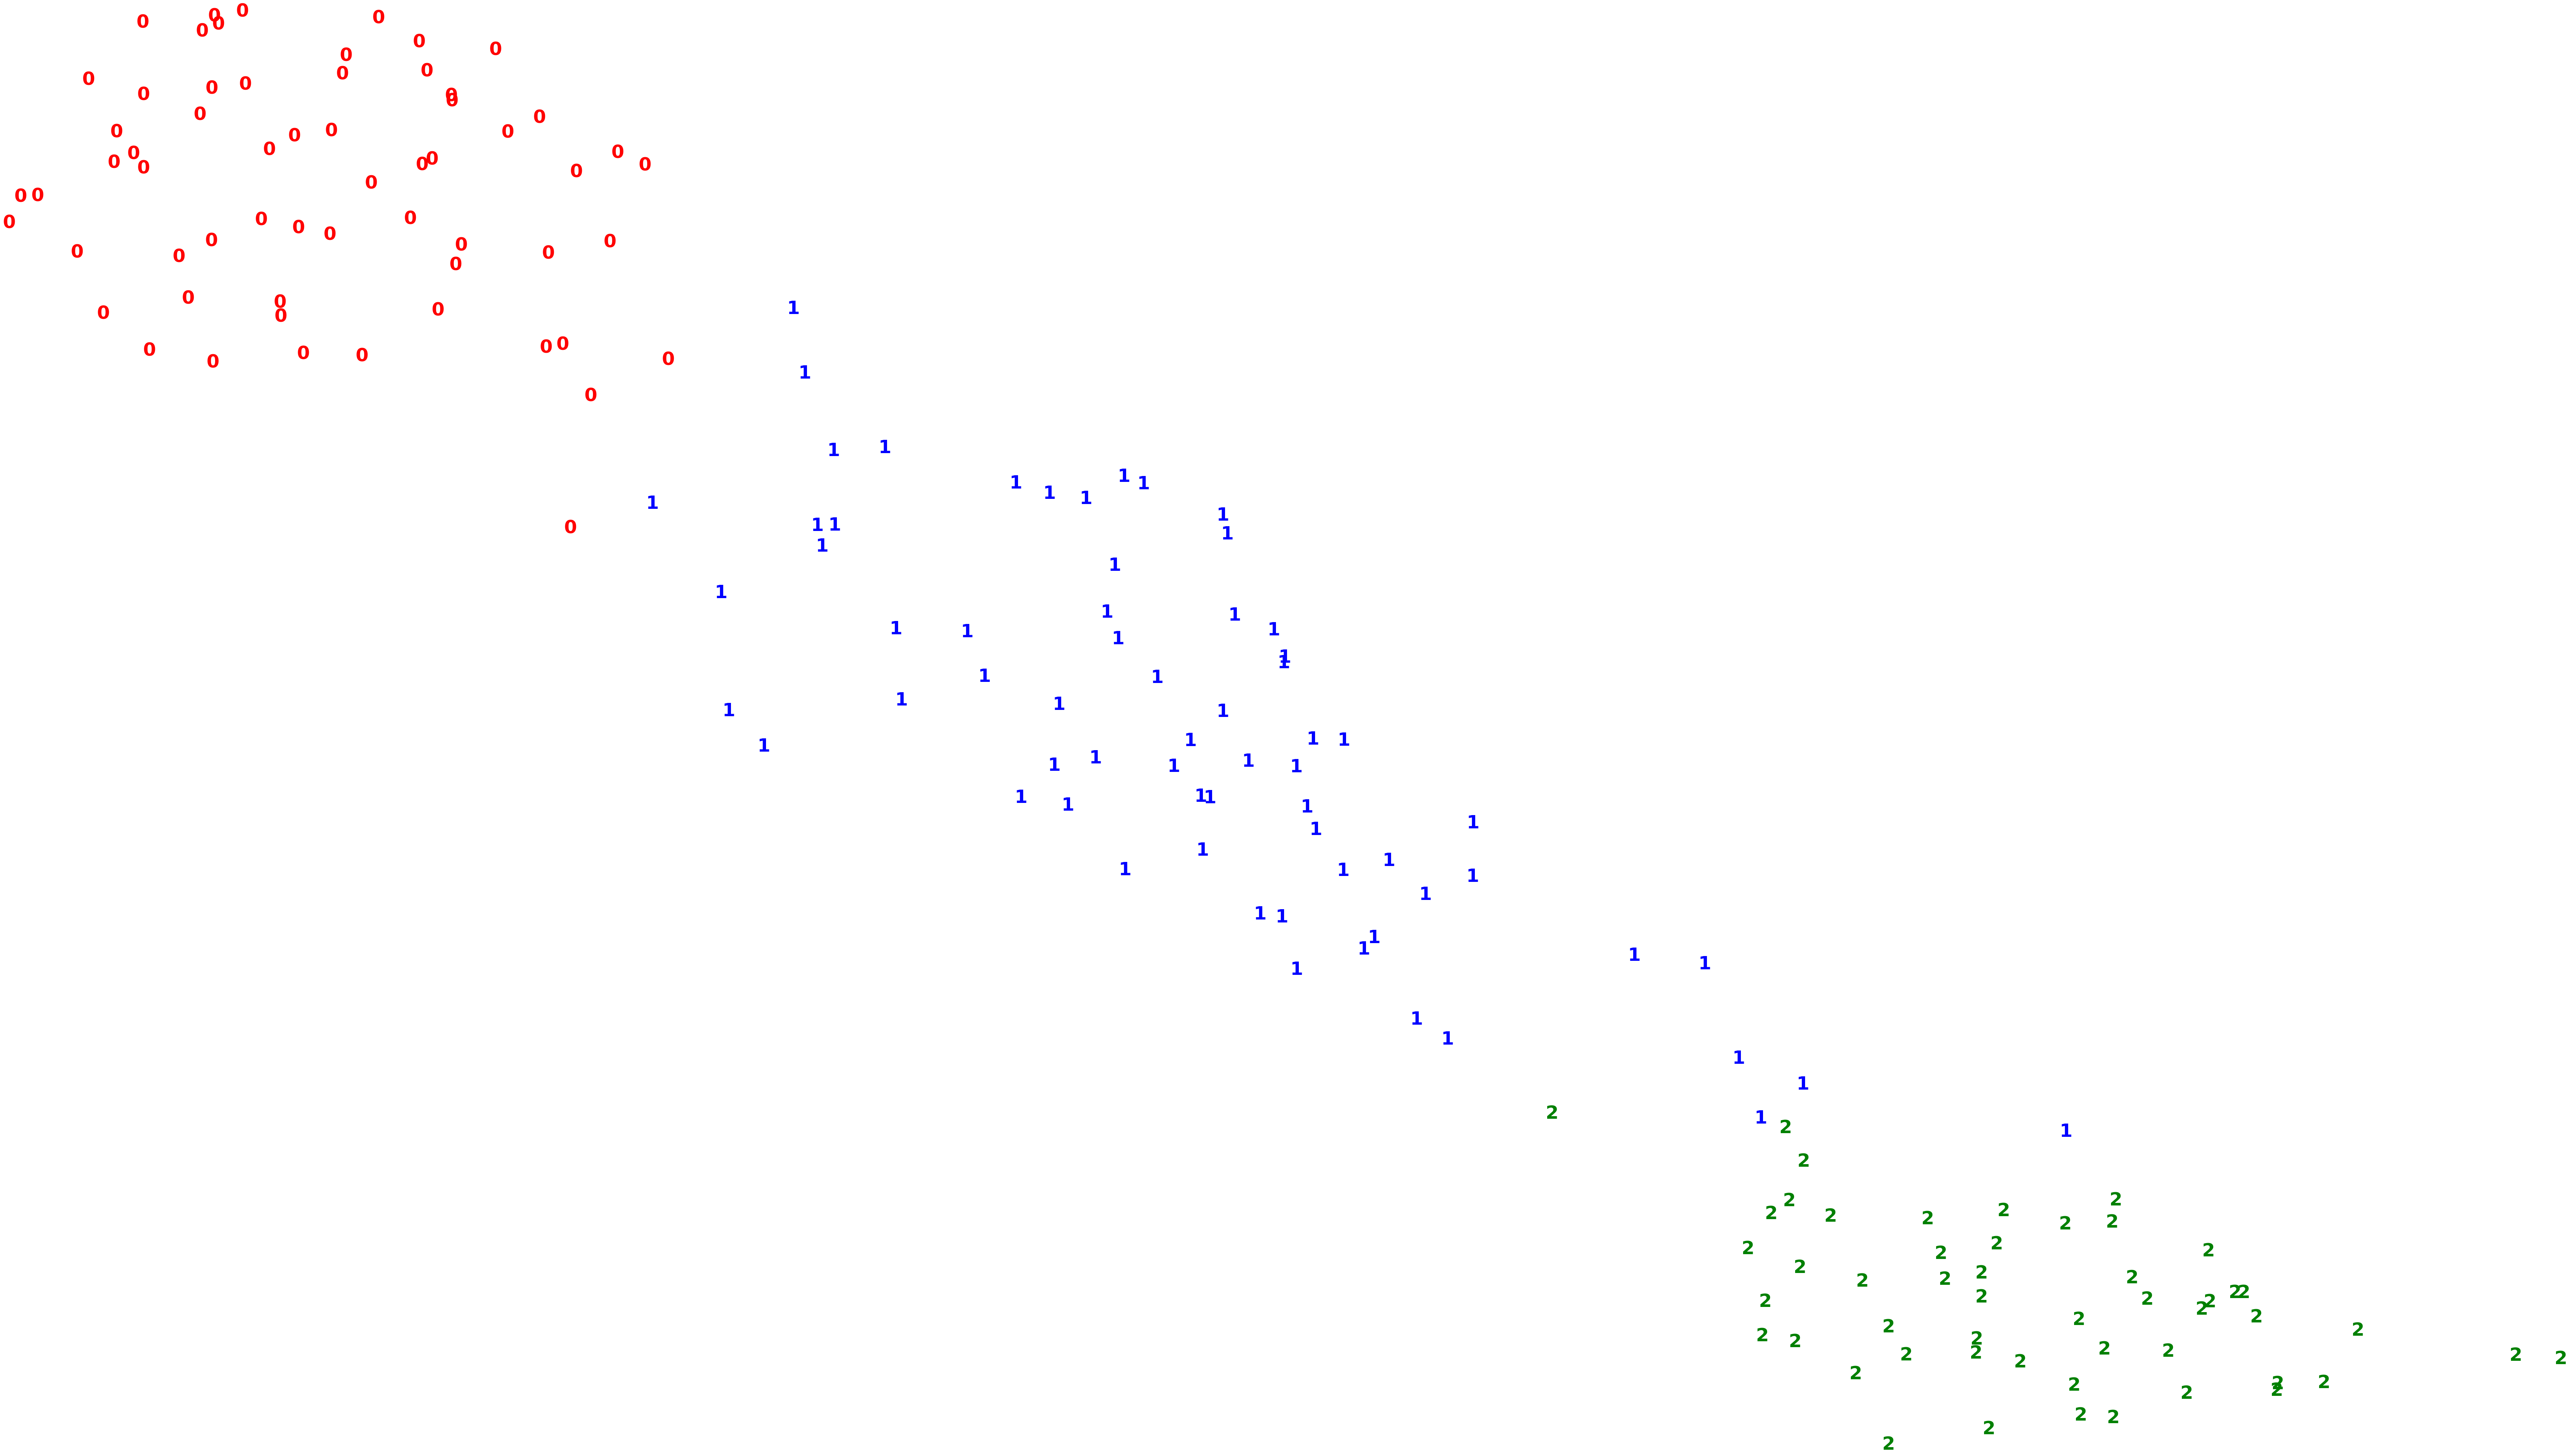

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y_pred[i]),
             color=colours[int(y_pred[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

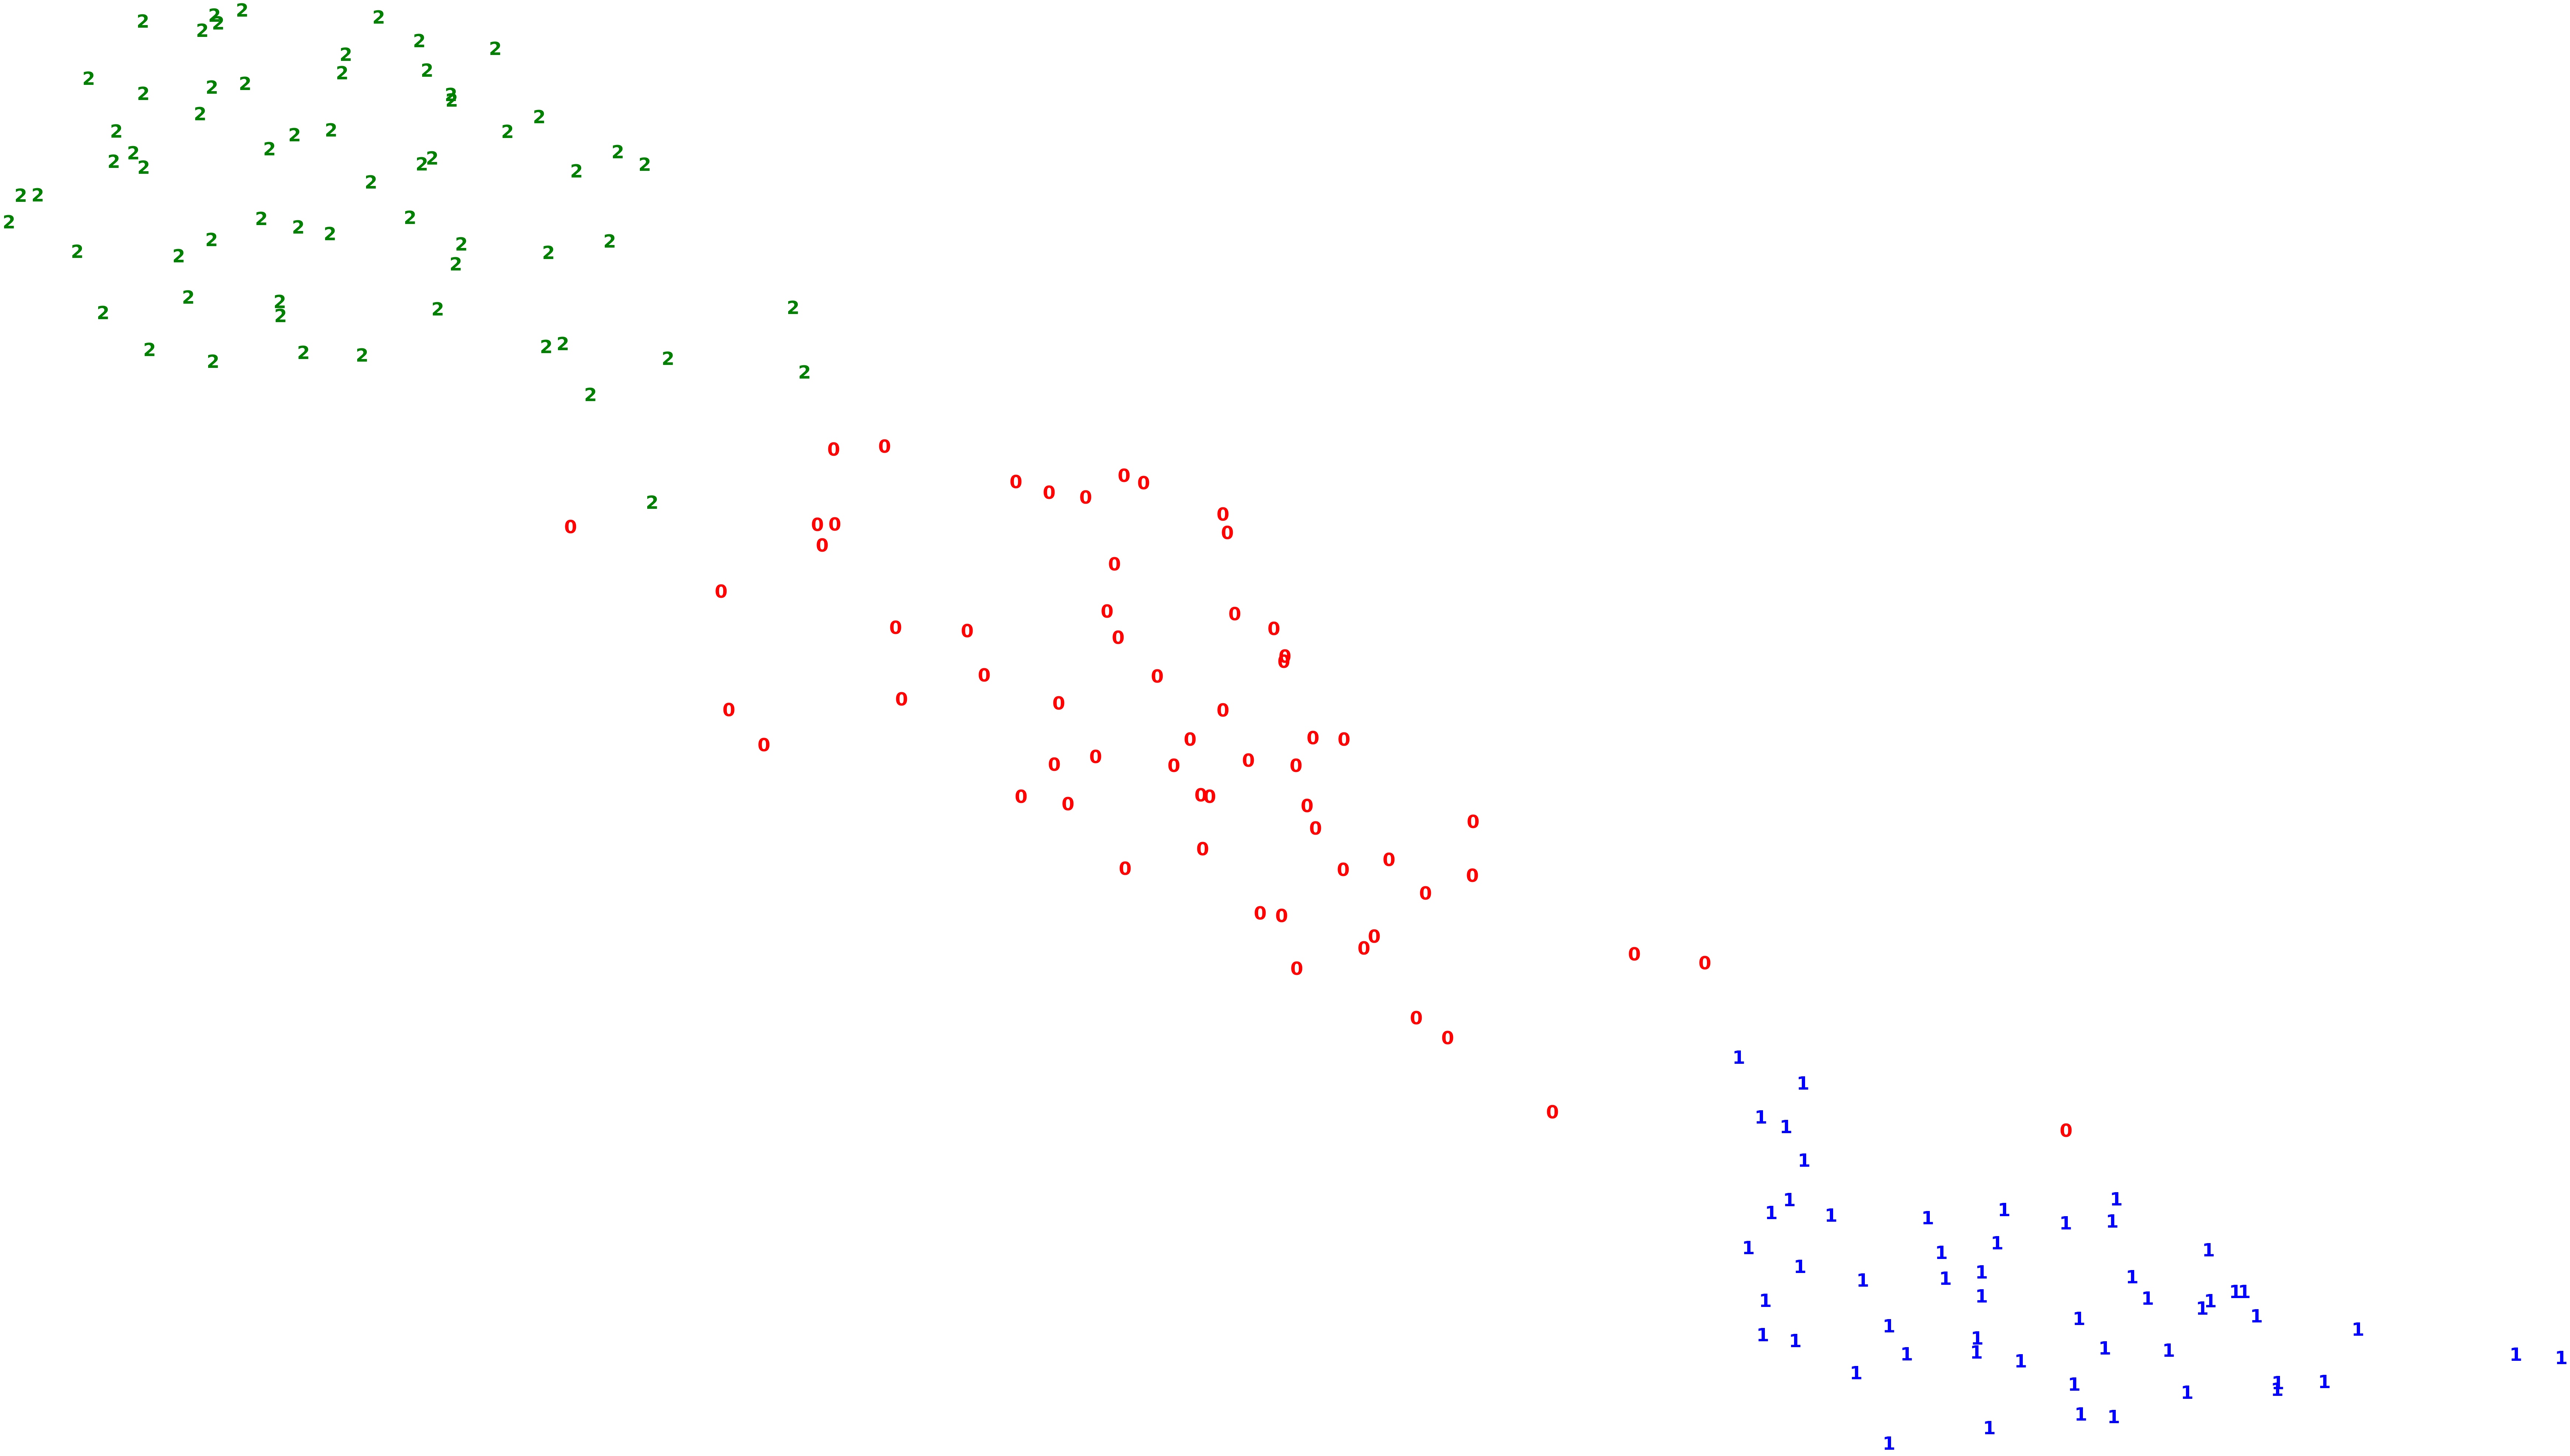

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(gmmclusters_corr[i]),
             color=colours[int(gmmclusters_corr[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

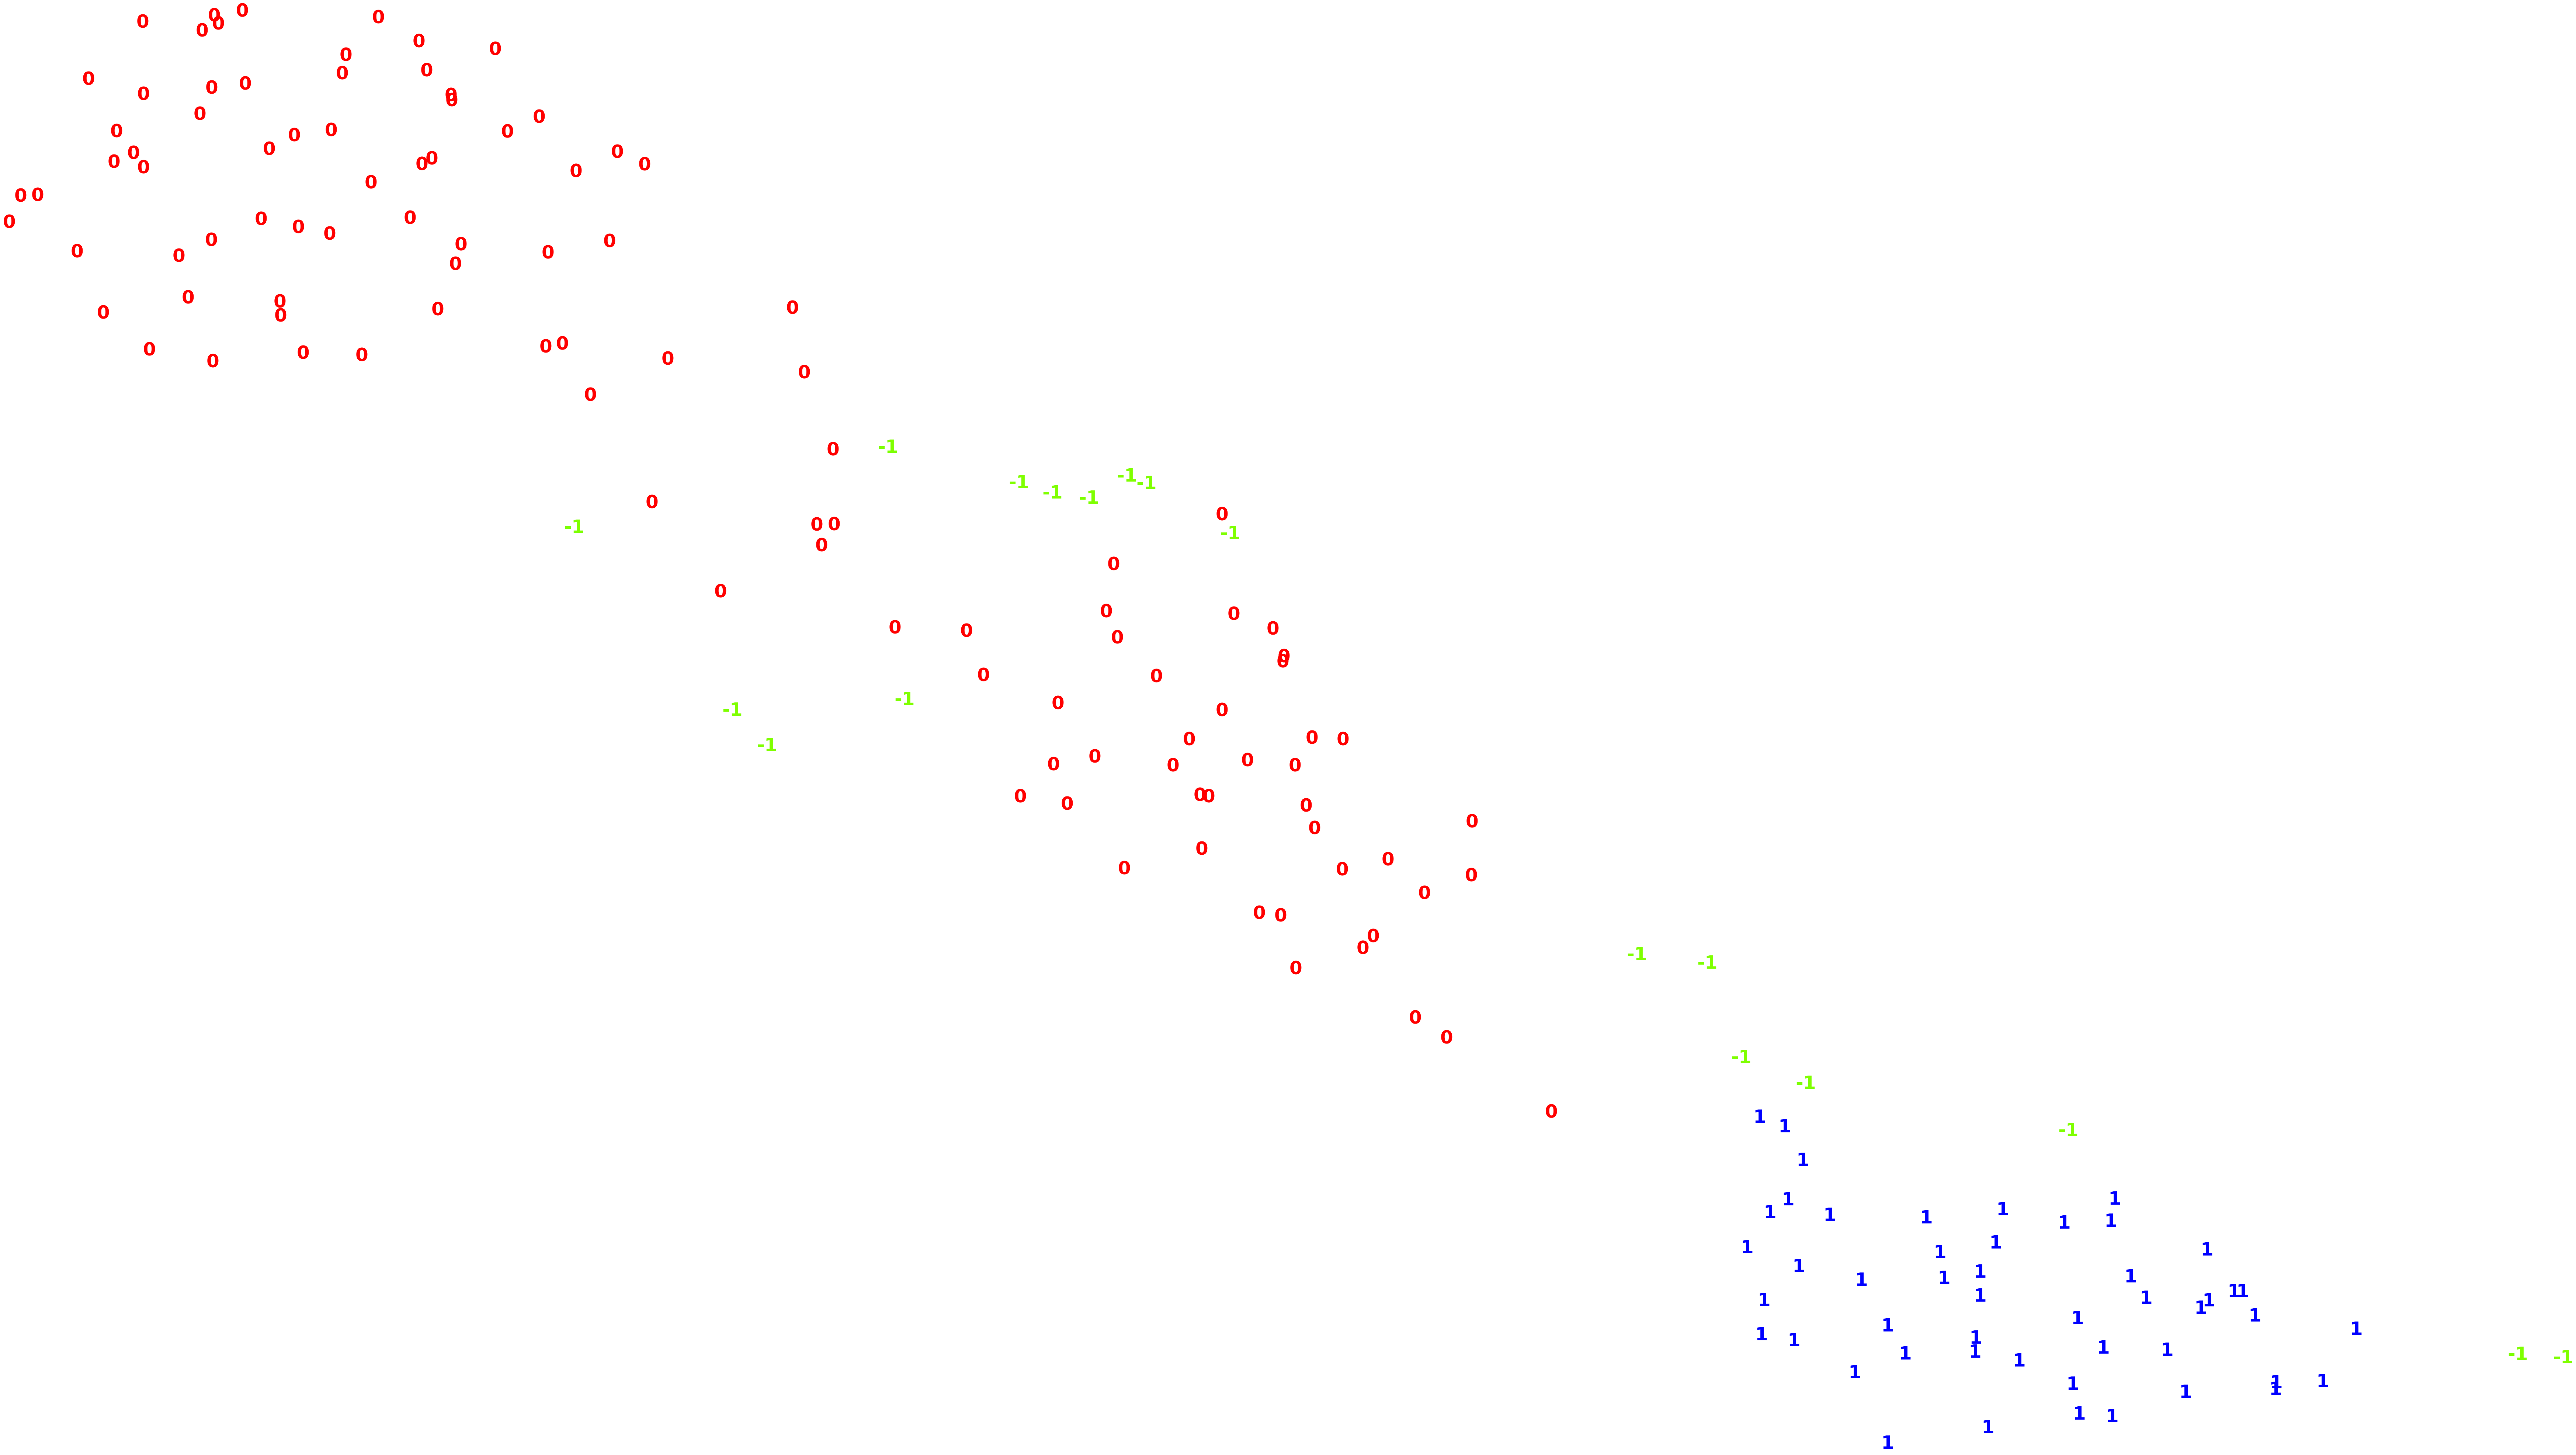

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(dbclusters_corr[i]),
             color=colours[int(dbclusters_corr[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

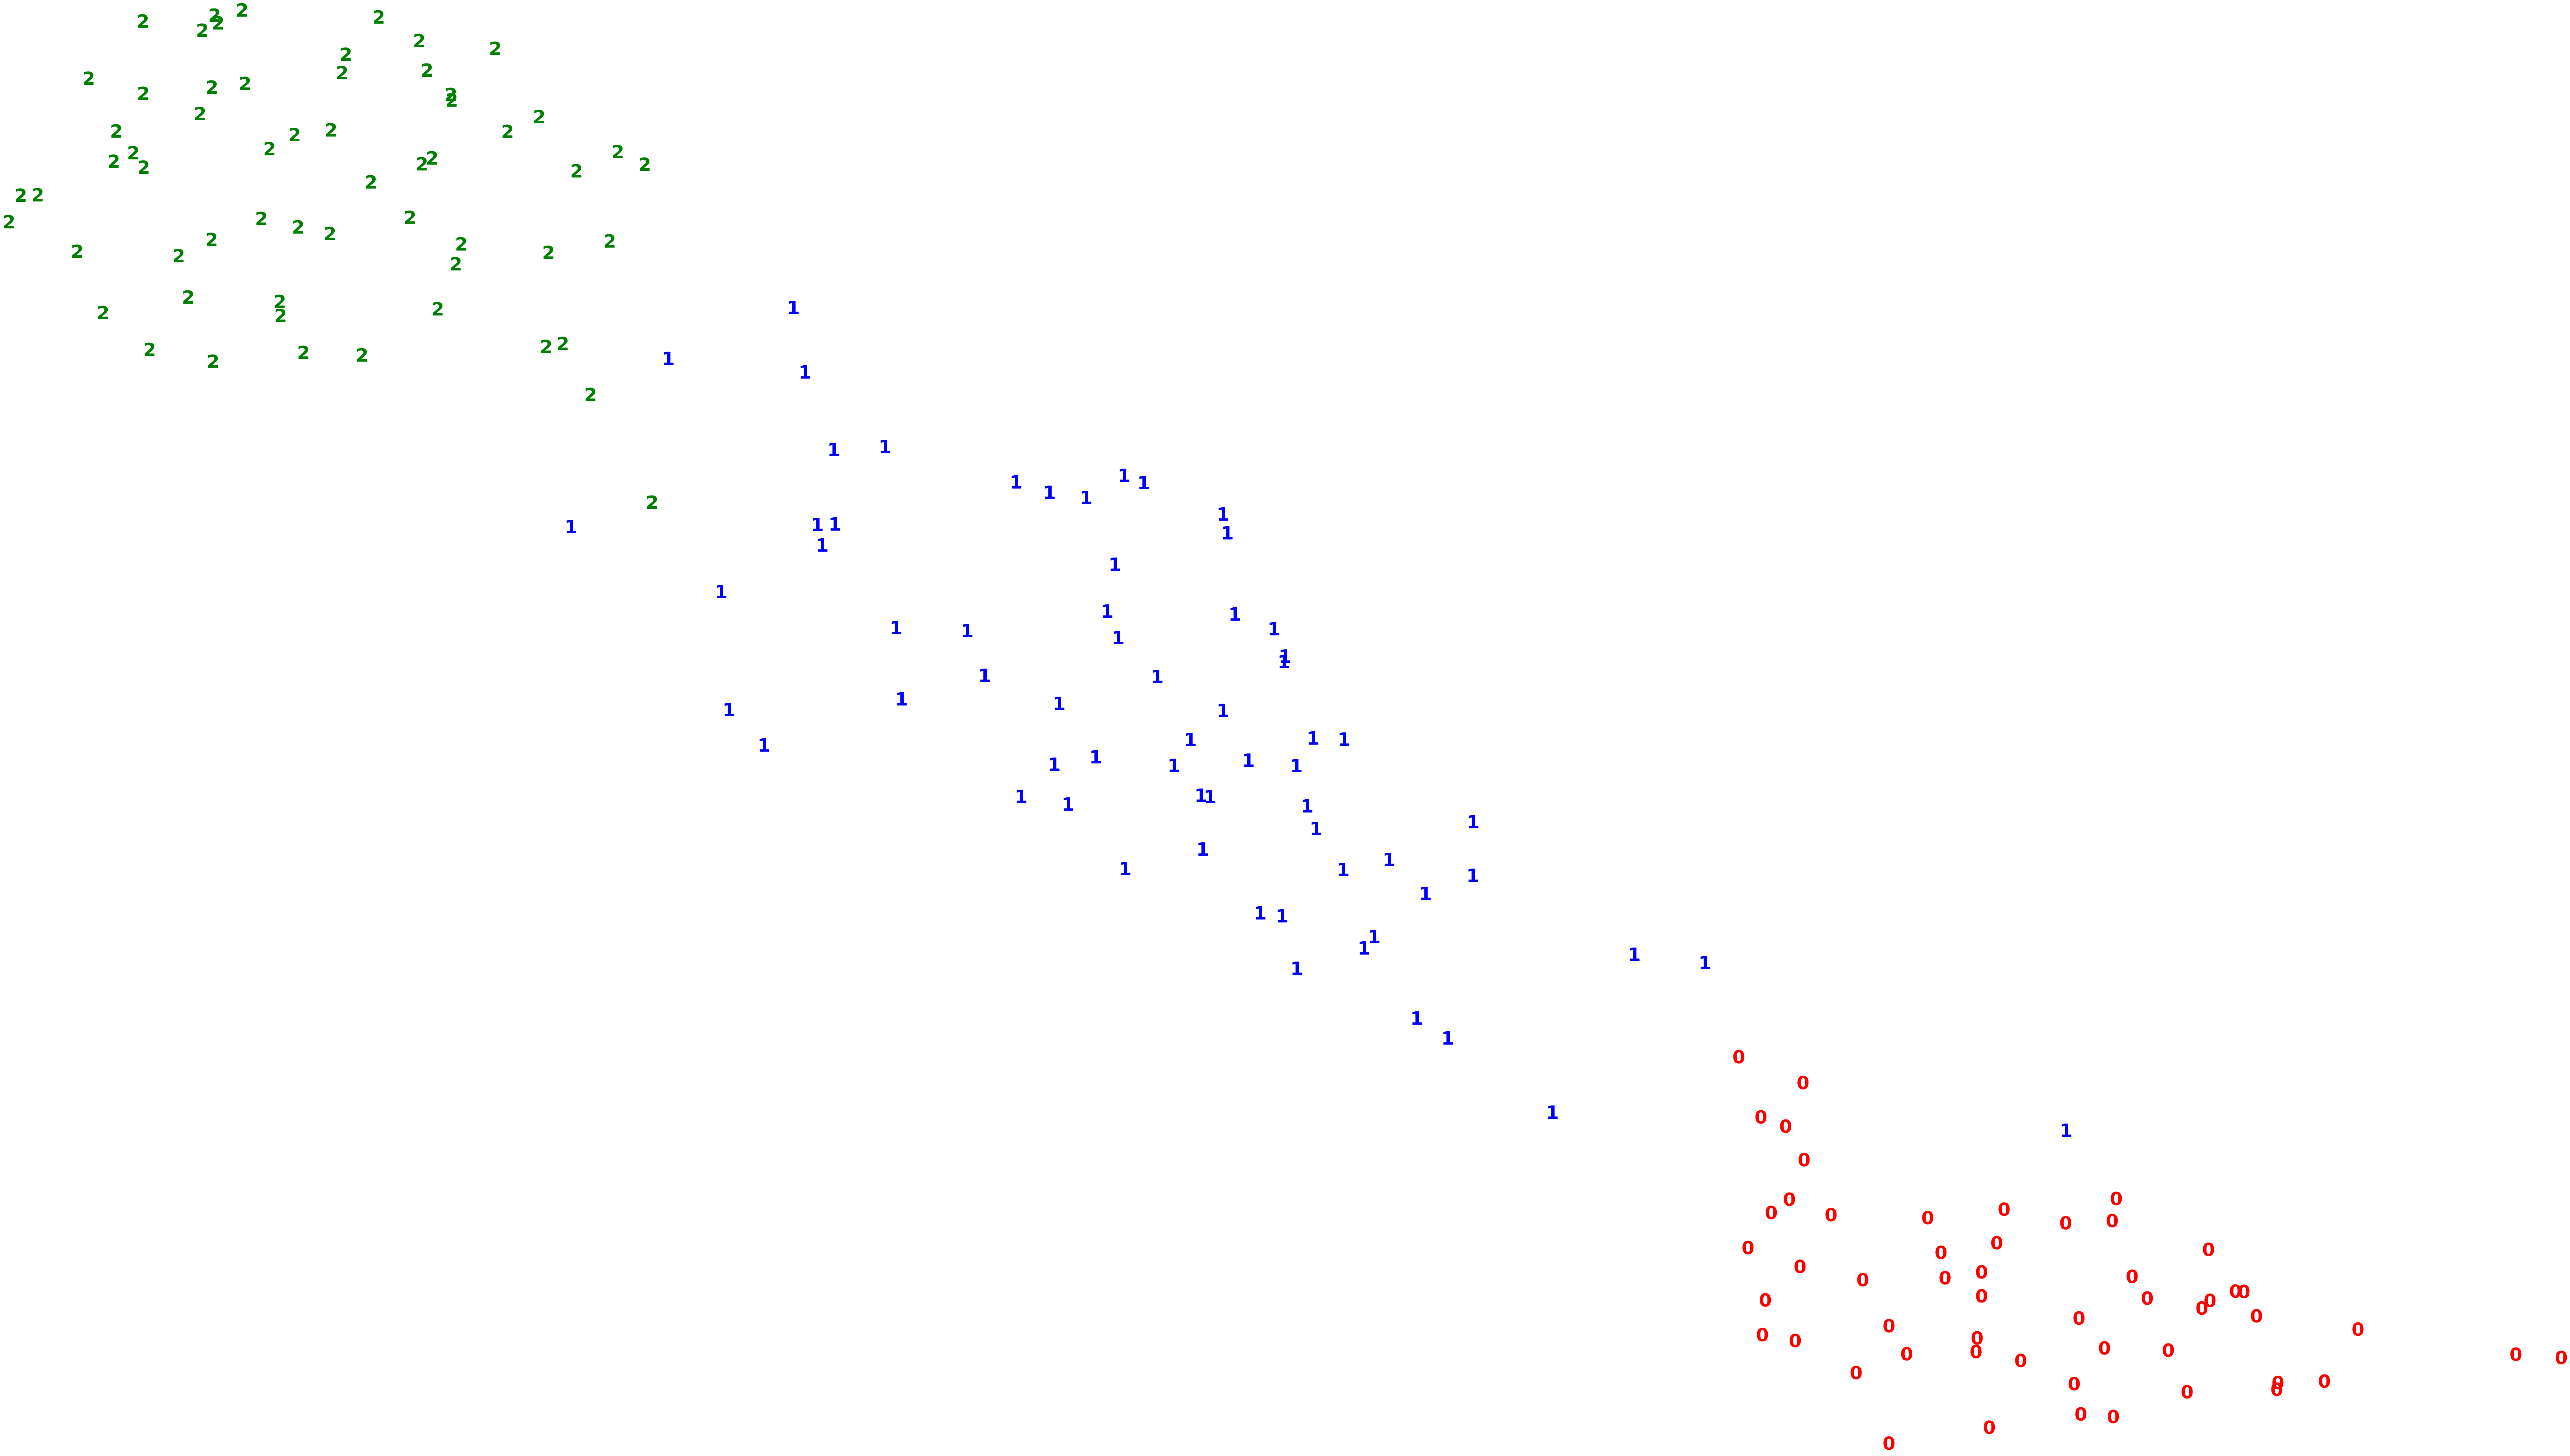

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(clusters_corr[i]),
             color=colours[int(clusters_corr[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Thank you for taking a look at my notebook and the models i produced within it. As we can see from the visuals and the respective silhouette scores, k-means seemedd to perform the best, along with the correlated data, producing a silhouette score of 40. We can also see that TSNE performed very well by producing very clean and well-defined clusters of the data using k-means.